In [1]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.10 (Ootpa)

Matrix products: default
BLAS/LAPACK: /scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/libopenblasp-r0.3.23.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/New_York
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] digest_0.6.35   IRdisplay_1.1   utf8_1.2.4      base64enc_0.1-3
 [5] fastmap_1.1.1   glue_1.7.0      htmltools_0.5.7 repr_1.1.6     
 [9] lifecycle_1.0.4 cli_3.6.2       

In [2]:
suppressPackageStartupMessages({
  library(Seurat)
  library(dplyr)
  library(ggplot2)
  library(scCustomize)
  library(scater)
    library(RColorBrewer)
    library(data.table)
    library(stringr)
library(tibble)
    library(tidyr)
    library(scDblFinder)
    library(scCustomize)
})

In [3]:
fig.size <- function (height, width, res=300) {
    options(repr.plot.height = height, repr.plot.width = width, resolution=res)
}

In [261]:
homo = readRDS(
    glue::glue(
            '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis',
            '/results/seurat_2/cancer_research_rebuttal/combined_new_5_homo.rds'
        )
)

In [5]:
hemi = readRDS(
    glue::glue(
            '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis',
            '/results/seurat_2/cancer_research_rebuttal/combined_new_5_hemi.rds'
        )
)

In [143]:
tumor.int = readRDS(
    '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/data/dong_et_al/20240901_6_sample_tumor_int.rds')

In [146]:
tumor.int@meta.data$annot

orig.ident nCount_RNA nFeature_RNA percent.mt
AAACCCAAGATCCAAA.1_1 T162       1902        993         7.3080967 
AAACCCAAGCACAAAT.1_1 T162       2425       1083         4.2061856 
AAACCCAAGCACTTTG.1_1 T162       4447       1828         5.0371037 
AAACCCAAGGCAGGGA.1_1 T162       1402        818         2.1398003 
AAACCCACAACCCTCT.1_1 T162       2145       1122         6.1072261 
AAACCCACAAGCCATT.1_1 T162       3139       1564         0.9875757 
                     scDblFinder.class scDblFinder.score integrated_snn_res.0.2
AAACCCAAGATCCAAA.1_1 singlet           0.0017687298      0                     
AAACCCAAGCACAAAT.1_1 singlet           0.1785652936      0                     
AAACCCAAGCACTTTG.1_1 singlet           0.1838824600      1                     
AAACCCAAGGCAGGGA.1_1 singlet           0.0006778225      0                     
AAACCCACAACCCTCT.1_1 singlet           0.0008202924      1                     
AAACCCACAAGCCATT.1_1 singlet           0.0658901930      6                     
                     integrated_snn_res.0.4 integrated_snn_res.0.5
AAACCCAAGATCCAAA.1_1 0                      0                     
AAACCCAAGCACAAAT.1_1 0                      0                     
AAACCCAAGCACTTTG.1_1 2                      2                     
AAACCCAAGGCAGGGA.1_1 1                      1                     
AAACCCACAACCCTCT.1_1 2                      2                     
AAACCCACAAGCCATT.1_1 7                      8                     
                     integrated_snn_res.0.6 ⋯ HALLMARK_MYC_TARGETS_V18
AAACCCAAGATCCAAA.1_1 1                      ⋯ 0.2639538               
AAACCCAAGCACAAAT.1_1 1                      ⋯ 0.4190668               
AAACCCAAGCACTTTG.1_1 2                      ⋯ 0.6920614               
AAACCCAAGGCAGGGA.1_1 0                      ⋯ 0.3178294               
AAACCCACAACCCTCT.1_1 2                      ⋯ 0.5546233               
AAACCCACAAGCCATT.1_1 9                      ⋯ 0.7580695               
                     HALLMARK_MYC_TARGETS_V29 HALLMARK_NOTCH_SIGNALING10
AAACCCAAGATCCAAA.1_1  0.08326525              0.06383489                
AAACCCAAGCACAAAT.1_1 -0.01562554              0.06673352                
AAACCCAAGCACTTTG.1_1  0.12939617              0.17528153                
AAACCCAAGGCAGGGA.1_1 -0.02454646              0.06110033                
AAACCCACAACCCTCT.1_1 -0.08151896              0.03024955                
AAACCCACAAGCCATT.1_1  0.14021392              0.02411765                
                     HALLMARK_P53_PATHWAY11 HALLMARK_PI3K_AKT_MTOR_SIGNALING12
AAACCCAAGATCCAAA.1_1  0.036513361           -0.007426689                      
AAACCCAAGCACAAAT.1_1  0.010687733            0.036843601                      
AAACCCAAGCACTTTG.1_1  0.068898471            0.112076788                      
AAACCCAAGGCAGGGA.1_1 -0.001834068           -0.011707606                      
AAACCCACAACCCTCT.1_1  0.058695696            0.011562654                      
AAACCCACAAGCCATT.1_1 -0.028427635            0.061195994                      
                     HALLMARK_TGF_BETA_SIGNALING13
AAACCCAAGATCCAAA.1_1 -0.048459993                 
AAACCCAAGCACAAAT.1_1 -0.009797092                 
AAACCCAAGCACTTTG.1_1  0.007965255                 
AAACCCAAGGCAGGGA.1_1 -0.156903564                 
AAACCCACAACCCTCT.1_1 -0.101760022                 
AAACCCACAAGCCATT.1_1 -0.023535888                 
                     HALLMARK_TNFA_SIGNALING_VIA_NFKB14
AAACCCAAGATCCAAA.1_1 -0.05491517                       
AAACCCAAGCACAAAT.1_1 -0.07867645                       
AAACCCAAGCACTTTG.1_1 -0.06501811                       
AAACCCAAGGCAGGGA.1_1 -0.02491742                       
AAACCCACAACCCTCT.1_1 -0.01220696                       
AAACCCACAAGCCATT.1_1  0.01545560                       
                     HALLMARK_WNT_BETA_CATENIN_SIGNALING15 MYCN1       
AAACCCAAGATCCAAA.1_1 -0.06343272                            0.014563678
AAACCCAAGCACAAAT.1_1  0.03151314                           -0.0035441

In [7]:
human_meta = read.csv('human_homo_hemi_metadata/tumor_metadata.csv')

In [8]:
homo_meta = read.csv('human_homo_hemi_metadata/homo_metadata.csv')

In [9]:
hemi_meta = read.csv('human_homo_hemi_metadata/hemi_metadata.csv')

In [265]:
hemi@meta.data$annot.new = hemi_meta$annot.new

In [266]:
homo@meta.data$annot.new = homo_meta$annot.new

In [22]:
all_cell_types = union(union(
   unique(tumor.int$annot),
   unique(homo$annot.new)
    ),
   unique(hemi$annot.new)
)

In [23]:
color.list = ggthemes::tableau_color_pal('Tableau 20')(20)
#color.list = hue_pal()(15)
names(color.list) = all_cell_types

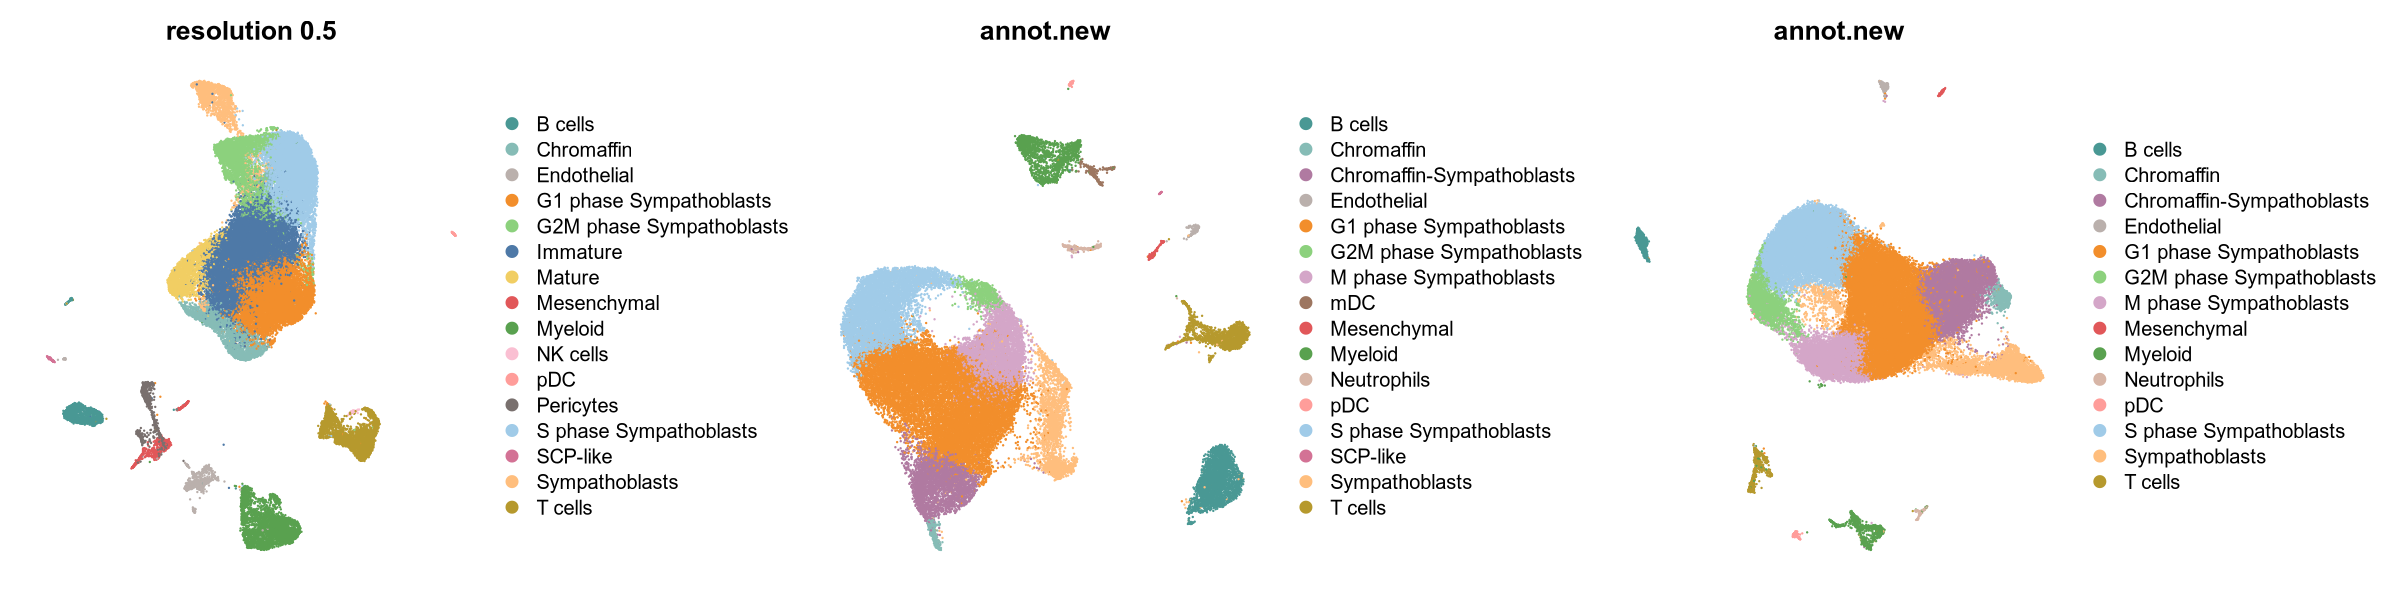

In [25]:
fig.size(5,20)
p.hs = DimPlot(tumor.int, label = F, reduction = "umap", 
               group.by = "annot")+labs(title="resolution 0.5") +scale_color_manual(values = color.list) + NoAxes()
p.homo = DimPlot(homo, label=F, reduction="umap", group.by="annot.new")+scale_color_manual(values = color.list) + NoAxes()
p.hemi = DimPlot(hemi, label=F, reduction="umap", group.by="annot.new")+scale_color_manual(values = color.list) + NoAxes()
combined_plots = p.hs | p.homo | p.hemi
combined_plots

In [147]:
tumor.int@meta.data$annot.new = tumor.int@meta.data$annot

In [ ]:
fig.size(6,12)
immune.combined@meta.data %>%
    with(prop.table(table( orig.ident, seurat_clusters ), 1)) %>%
    data.table() %>%
    mutate(cluster = factor(seurat_clusters, (0:19))) %>%
    ggplot(aes(orig.ident, 100*N, fill = cluster)) +
    geom_bar(stat = 'identity', position = position_fill()) +
    ggthemes::scale_fill_tableau('Tableau 20') +
    coord_flip() +
    theme_test(base_size = 20)

In [28]:
tumor.int@meta.data$species = 'human'

In [31]:
hemi@meta.data$species = "hemi"
homo@meta.data$species = "homo"

In [34]:
whole.meta = rbind(
    tumor.int@meta.data %>% select(c('species', 'annot.new')),
    hemi@meta.data %>% select(c('species', 'annot.new')),
    homo@meta.data %>% select(c('species', 'annot.new'))
) 

In [36]:
whole.meta$annot.new = as.factor(whole.meta$annot.new)

In [39]:
levels(whole.meta$annot.new)

[1] "B cells"                   "Chromaffin"               
 [3] "Chromaffin-Sympathoblasts" "Endothelial"              
 [5] "G1 phase Sympathoblasts"   "G2M phase Sympathoblasts" 
 [7] "Immature"                  "M phase Sympathoblasts"   
 [9] "Mature"                    "mDC"                      
[11] "Mesenchymal"               "Myeloid"                  
[13] "Neutrophils"               "NK cells"                 
[15] "pDC"                       "Pericytes"                
[17] "S phase Sympathoblasts"    "SCP-like"                 
[19] "Sympathoblasts"            "T cells"

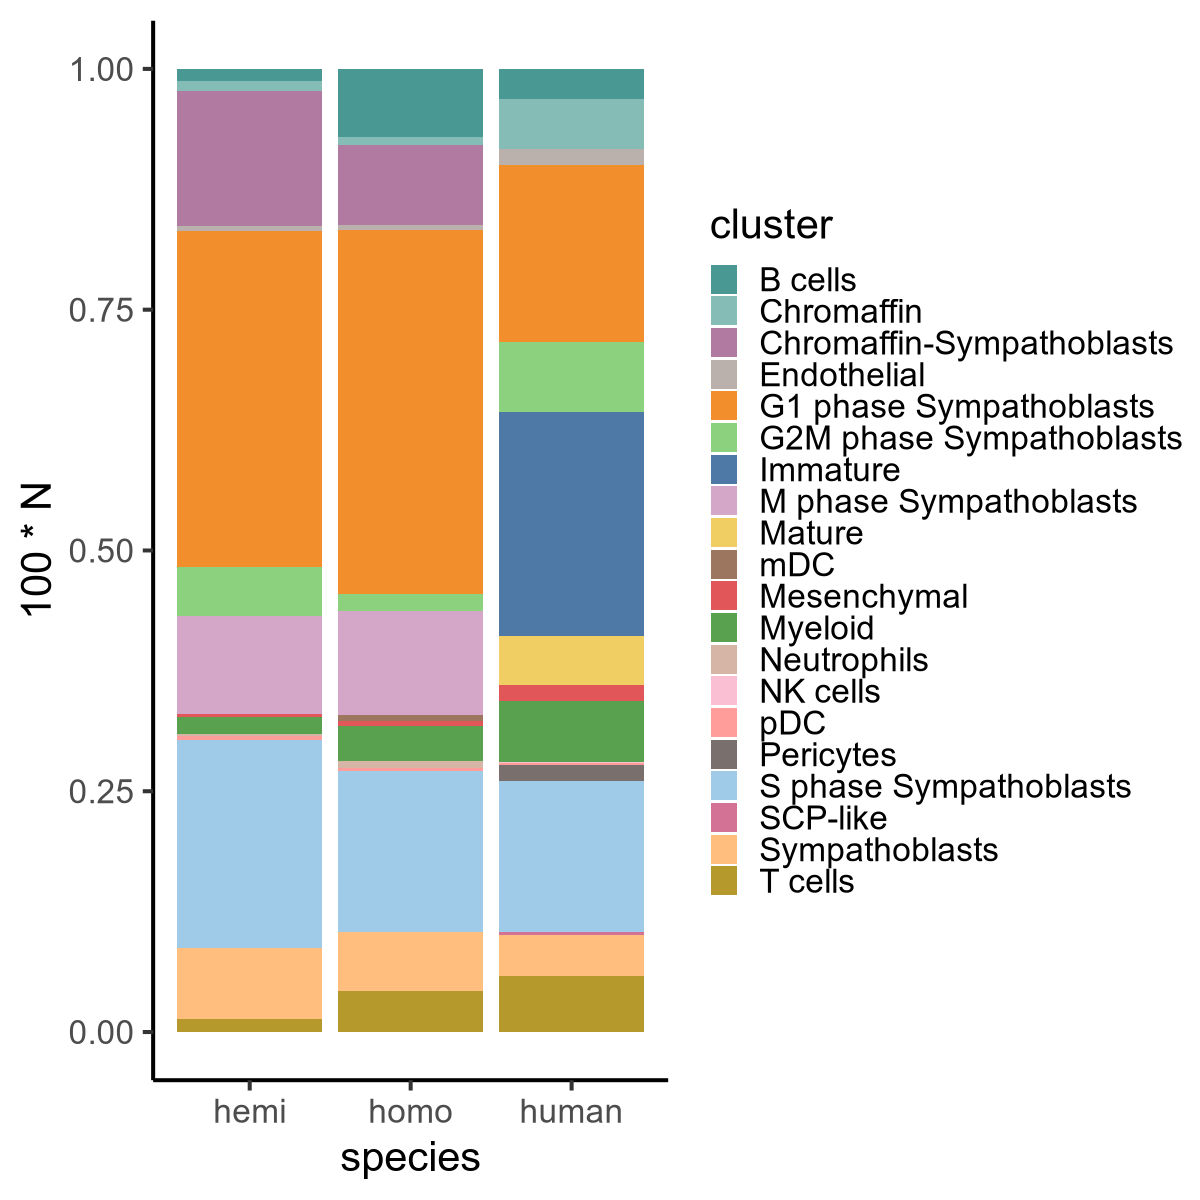

In [49]:
fig.size(10,10)
box.stacked.plot = whole.meta %>%
    with(prop.table(table( species, annot.new ), 1)) %>%
    data.table() %>%
    mutate(cluster = annot.new) %>%
    ggplot(aes(species, 100*N, fill = cluster)) +
    geom_bar(stat = 'identity', position = position_fill()) +
    scale_fill_manual(values = color.list) +
    theme_test(base_size = 25) +
    theme(
        panel.border = element_blank(),  # Remove the border around the panel
        axis.line.x = element_line(),     # Keep the x-axis line
        axis.line.y = element_line(),     # Keep the y-axis line
        axis.line = element_line(color = "black")  #
    )
box.stacked.plot

In [50]:
ggsave(
     glue::glue('/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/',
    'results/figures/2024/Figure_3/Figure_3E_cell_fraction_species.pdf'),
    plot =box.stacked.plot, 
    height = 10,
    width = 10,
    create.dir=TRUE
      )


In [51]:
Idents(tumor.int) = "annot.new"
Idents(homo) = "annot.new"
Idents(hemi) = "annot.new"

In [52]:
tumor.de = FindAllMarkers(tumor.int, 
    min.pct =  0.25, 
    min.diff.pct = 0.25,
    only.pos=TRUE                       
)

Calculating cluster Immature

Calculating cluster S phase Sympathoblasts

Calculating cluster G1 phase Sympathoblasts

Warning message in FindMarkers.default(object = data.use, slot = data.slot, counts = counts, :
“No features pass logfc.threshold threshold; returning empty data.frame”
Calculating cluster Sympathoblasts

Calculating cluster Myeloid

Calculating cluster G2M phase Sympathoblasts

Calculating cluster T cells

Calculating cluster Mature

Calculating cluster B cells

Calculating cluster Chromaffin

Calculating cluster Mesenchymal

Calculating cluster pDC

Calculating cluster Pericytes

Calculating cluster Endothelial

Calculating cluster SCP-like

Calculating cluster NK cells



In [53]:
hemi.de = FindAllMarkers(hemi, 
    min.pct =  0.25, 
    min.diff.pct = 0.25,
    only.pos=TRUE                       
)

Calculating cluster S phase Sympathoblasts

Calculating cluster G1 phase Sympathoblasts

Warning message in FindMarkers.default(object = data.use, slot = data.slot, counts = counts, :
“No features pass logfc.threshold threshold; returning empty data.frame”
Calculating cluster Endothelial

Calculating cluster M phase Sympathoblasts

Calculating cluster Chromaffin-Sympathoblasts

Calculating cluster Sympathoblasts

Calculating cluster G2M phase Sympathoblasts

Calculating cluster Myeloid

Calculating cluster Mesenchymal

Calculating cluster B cells

Calculating cluster T cells

Calculating cluster Neutrophils

Calculating cluster Chromaffin

Calculating cluster pDC



In [54]:
homo.de = FindAllMarkers(homo, 
    min.pct =  0.25, 
    min.diff.pct = 0.25,
    only.pos=TRUE                       
)

Calculating cluster T cells

Calculating cluster Chromaffin-Sympathoblasts

Calculating cluster Endothelial

Calculating cluster G1 phase Sympathoblasts

Calculating cluster S phase Sympathoblasts

Calculating cluster M phase Sympathoblasts

Calculating cluster B cells

Calculating cluster mDC

Calculating cluster Myeloid

Calculating cluster G2M phase Sympathoblasts

Calculating cluster Chromaffin

Calculating cluster Mesenchymal

Calculating cluster Sympathoblasts

Calculating cluster SCP-like

Calculating cluster Neutrophils

Calculating cluster pDC



In [55]:
saveRDS(tumor.de, 'human_homo_hemi_metadata/tumor_de.rds')
saveRDS(hemi.de, 'human_homo_hemi_metadata/hemi_de.rds')
saveRDS(homo.de, 'human_homo_hemi_metadata/homo_de.rds')

In [125]:
tumor_top_genes <- tumor.de %>%
  group_by(cluster) %>%
  top_n(n = 5, wt = avg_log2FC) %>%
  arrange(cluster, desc(avg_log2FC))

In [126]:
top_genes$cluster %>% levels

[1] "Immature"                 "S phase Sympathoblasts"  
 [3] "G1 phase Sympathoblasts"  "Sympathoblasts"          
 [5] "Myeloid"                  "G2M phase Sympathoblasts"
 [7] "T cells"                  "Mature"                  
 [9] "B cells"                  "Chromaffin"              
[11] "Mesenchymal"              "pDC"                     
[13] "Pericytes"                "Endothelial"             
[15] "SCP-like"                 "NK cells"

In [ ]:
homo@me

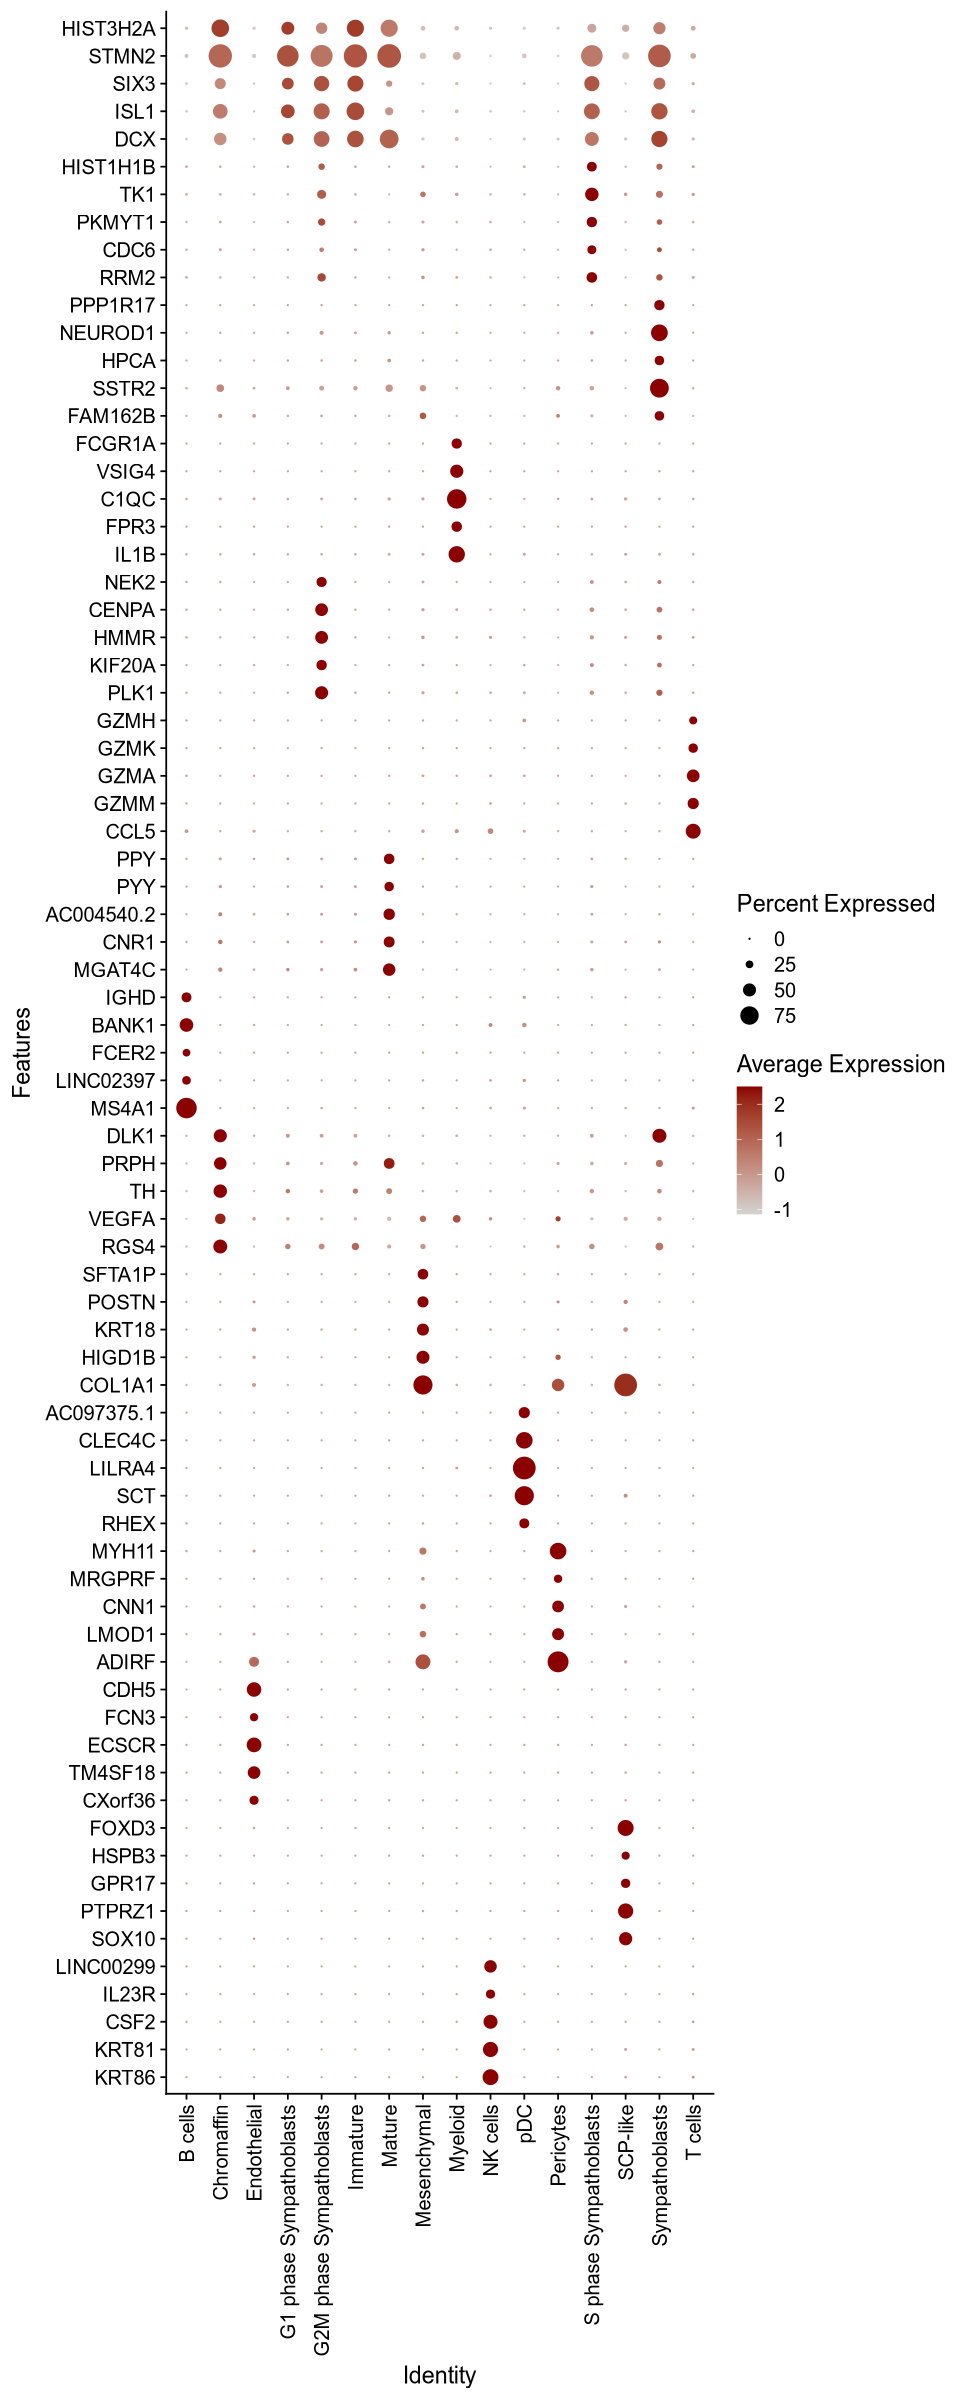

In [127]:
fig.size(20,8)
ptumor = DotPlot(
        tumor.int, 
        assay='RNA',
        features = top_genes$gene %>% rev, 
        group.by='annot.new', 
        cols = c("lightgrey", "darkred"))+
         coord_flip()+theme(axis.text.x = element_text(angle = 90, hjust = 1,vjust=0.5))
ptumor

In [132]:
ggsave(
     glue::glue('/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/',
    'results/figures/2024/Figure_3/Figure_3D_human_dotplot.pdf'),
    plot =ptumor, 
    height =20,
    width = 8,
    create.dir=TRUE
      )


In [212]:
sig_df = openxlsx::read.xlsx(
    'Figure_3D_order.xlsx'
) 

In [213]:
sig_df %>% head

Features Identity      
1 HIST3H2A Immature      
2 STMN2    Immature      
3 SIX3     Immature      
4 ISL1     Immature      
5 DCX      Immature      
6 PPP1R17  Sympathoblasts

In [214]:
unique(sig_df$Identity)

[1] "Immature"                 "Sympathoblasts"          
 [3] "G1 phase Sympathoblasts"  "S phase Sympathoblasts"  
 [5] "G2M phase Sympathoblasts" "Mature"                  
 [7] "Chromaffin"               "SCP-like"                
 [9] "Mesenchymal"              "Pericytes"               
[11] "Endothelial"              "B cells"                 
[13] "T cells"                  "NK cells"                
[15] "Myeloid"                  "pDC"

In [175]:
tumor.int = readRDS(
    '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/data/dong_et_al/20240901_6_sample_tumor_int.rds')

In [216]:
#tumor.int@meta.data %>% filter(Identity == 'SCP-like')

In [217]:
tumor.int$annot.new = tumor.int$annot

In [218]:
seurat_obj = tumor.int

In [219]:
seurat_obj$annot.new = factor(
    tumor.int$annot.new, levels=unique(sig_df$Identity))

In [220]:
seurat_obj$annot.new %>% table

.
                Immature           Sympathoblasts  G1 phase Sympathoblasts 
                   11660                     2133                     9191 
  S phase Sympathoblasts G2M phase Sympathoblasts                   Mature 
                    7860                     3660                     2534 
              Chromaffin                 SCP-like              Mesenchymal 
                    2621                      130                      813 
               Pericytes              Endothelial                  B cells 
                     829                      810                     1552 
                 T cells                 NK cells                  Myeloid 
                    2926                       57                     3166 
                     pDC 
                     107 

In [221]:
unique(sig_df$Identity)

[1] "Immature"                 "Sympathoblasts"          
 [3] "G1 phase Sympathoblasts"  "S phase Sympathoblasts"  
 [5] "G2M phase Sympathoblasts" "Mature"                  
 [7] "Chromaffin"               "SCP-like"                
 [9] "Mesenchymal"              "Pericytes"               
[11] "Endothelial"              "B cells"                 
[13] "T cells"                  "NK cells"                
[15] "Myeloid"                  "pDC"

In [226]:
setdiff(
    seurat_obj$annot %>% unique,
    seurat_obj$annot.new %>% levels
)

character(0)

In [254]:
seurat_obj$annot.new %>% levels %>% length

[1] 16

In [253]:
homo$annot.new %>% unique %>% length

[1] 16

[1] 16

In [227]:
tumor.int$annot.new %>% factor %>% levels %>% length

[1] 16

In [228]:
intersect(seurat_obj$annot.new %>% levels, unique(sig_df$Identity)) %>% length

[1] 16

In [181]:
unique(sig_df$Identity)

[1] "Immature"                 "Sympathoblasts"          
 [3] "G1 phase Sympathoblasts"  "S phase Sympathoblasts"  
 [5] "G2M phase Sympathoblasts" "Mature"                  
 [7] "Chromaffin"               "SCP−like"                
 [9] "Mesenchymal"              "Pericytes"               
[11] "Endothelial"              "B cells"                 
[13] "T cells"                  "NK cells"                
[15] "Myeloid"                  "pDC"

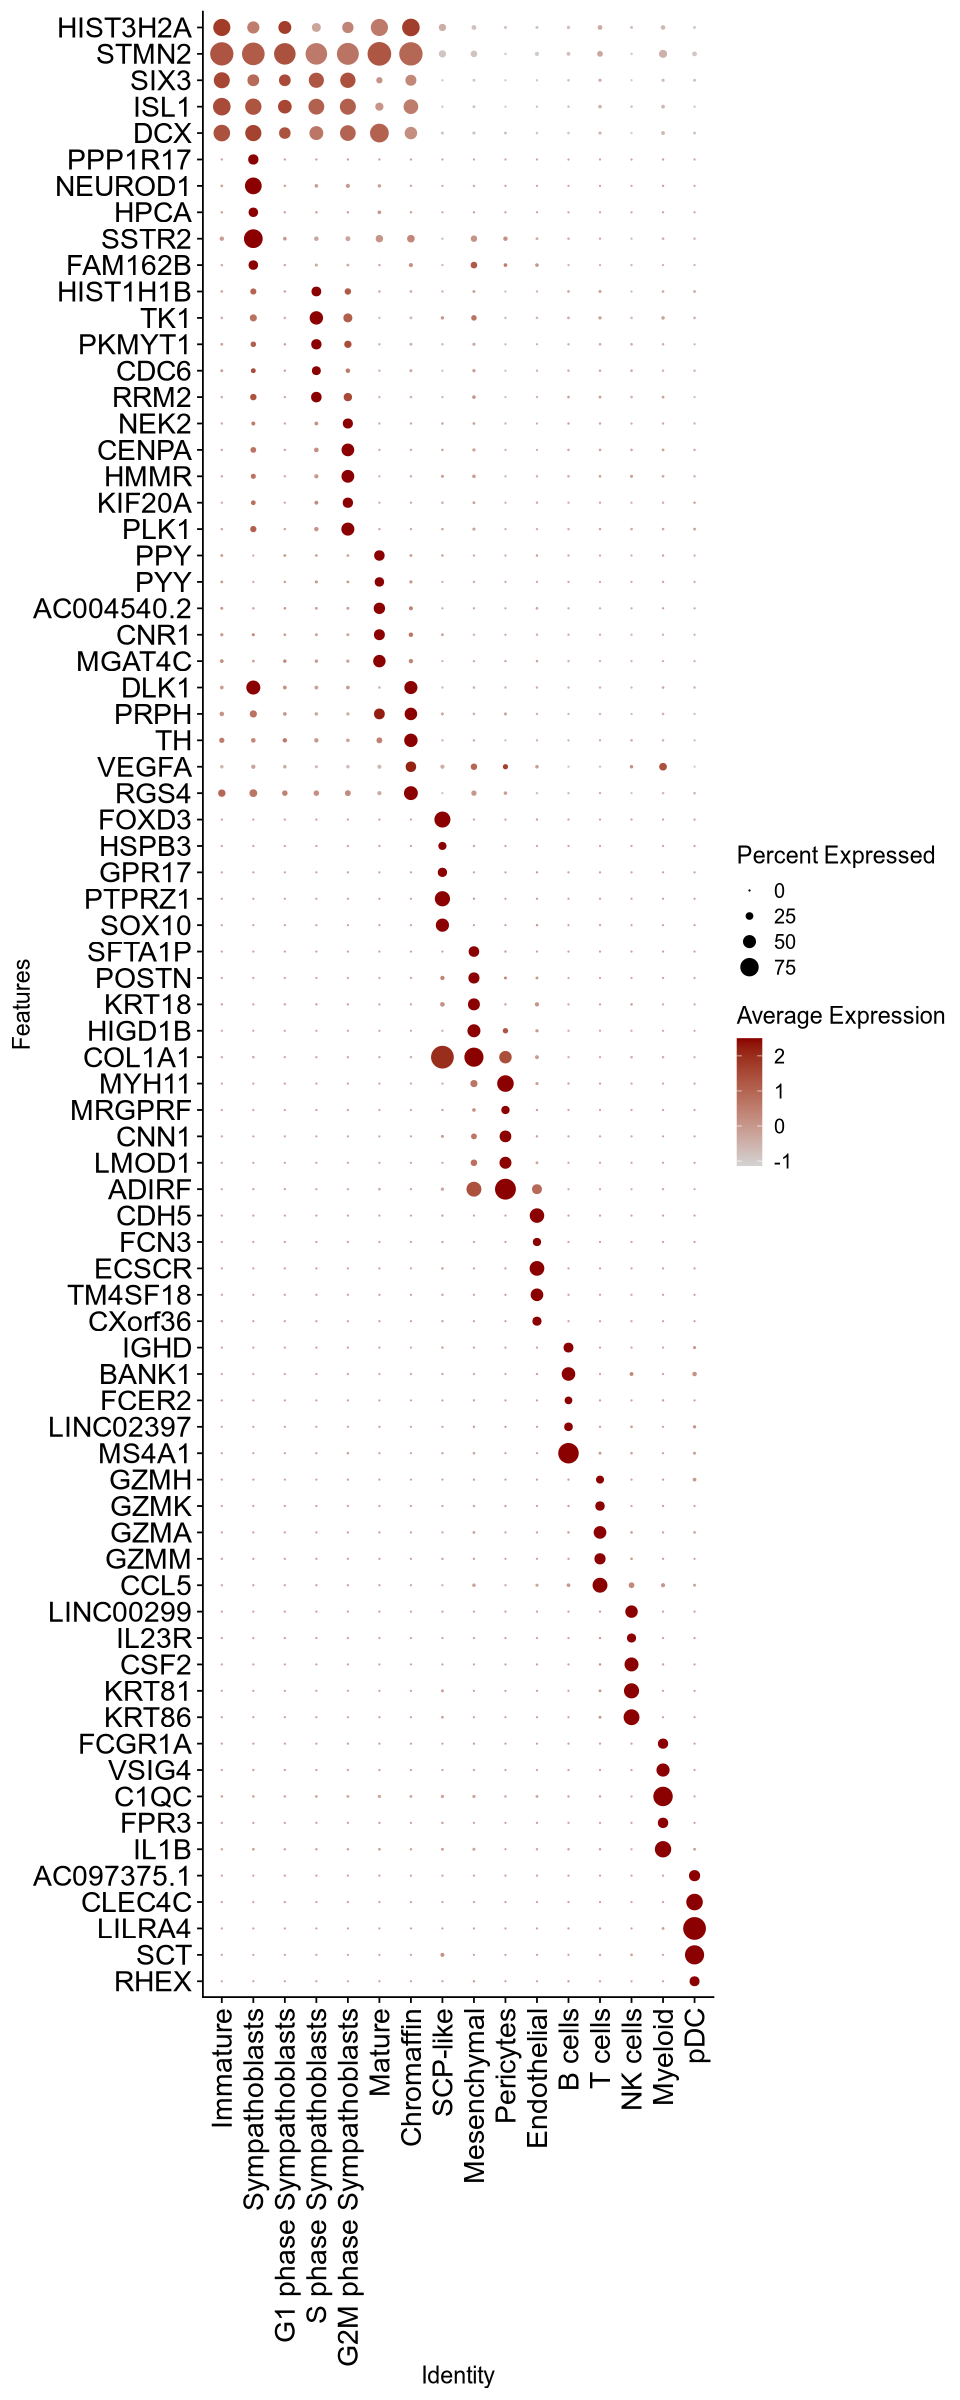

In [230]:
fig.size(20,8)
longdotplot = DotPlot(
    seurat_obj, 
        assay='RNA',
        features = unique(sig_df$Features) %>% rev, 
        group.by='annot.new', 
        cols = c("lightgrey", "darkred"))+
         coord_flip()+theme(
             axis.text.x = element_text(
                 angle = 90, hjust=1, vjust=0.5,
             size=17),
             axis.text.y = element_text(
             size=17)
         )
longdotplot

In [232]:
new_ortho = readRDS('../../../Ortholog_human_mouse_MYCN.rds')

In [234]:
intersect(
    unique(sig_df$Features) %>% str_to_title,
    homo %>% rownames
    
) %>% length

[1] 60

In [298]:
new_ortho[unique(sig_df$Features)]

ERROR: Error in `[.data.frame`(new_ortho, unique(sig_df$Features)): undefined columns selected


In [277]:
homo$annot.new %>% table %>% names

[1] "B cells"                   "Chromaffin"               
 [3] "Chromaffin-Sympathoblasts" "Endothelial"              
 [5] "G1 phase Sympathoblasts"   "G2M phase Sympathoblasts" 
 [7] "M phase Sympathoblasts"    "mDC"                      
 [9] "Mesenchymal"               "Myeloid"                  
[11] "Neutrophils"               "pDC"                      
[13] "S phase Sympathoblasts"    "SCP-like"                 
[15] "Sympathoblasts"            "T cells"

In [282]:
seurat_obj$annot.new %>% levels

[1] "Immature"                 "Sympathoblasts"          
 [3] "G1 phase Sympathoblasts"  "S phase Sympathoblasts"  
 [5] "G2M phase Sympathoblasts" "Mature"                  
 [7] "Chromaffin"               "SCP-like"                
 [9] "Mesenchymal"              "Pericytes"               
[11] "Endothelial"              "B cells"                 
[13] "T cells"                  "NK cells"                
[15] "Myeloid"                  "pDC"

In [288]:
homo_copy = homo

In [289]:
homo$annot.new %>% table %>% names

[1] "B cells"                   "Chromaffin"               
 [3] "Chromaffin-Sympathoblasts" "Endothelial"              
 [5] "G1 phase Sympathoblasts"   "G2M phase Sympathoblasts" 
 [7] "M phase Sympathoblasts"    "mDC"                      
 [9] "Mesenchymal"               "Myeloid"                  
[11] "Neutrophils"               "pDC"                      
[13] "S phase Sympathoblasts"    "SCP-like"                 
[15] "Sympathoblasts"            "T cells"

In [290]:
homo_rearranged <- c('Sympathoblasts', 'G1 phase Sympathoblasts', 
                     'S phase Sympathoblasts', 'M phase Sympathoblasts', 
                     'G2M phase Sympathoblasts', 'Chromaffin-Sympathoblasts', 
                     'Chromaffin', 'SCP-like', 'Mesenchymal', 
                     'Endothelial','Neutrophils', 'mDC', 'B cells', 'T cells', 'Myeloid', 'pDC'
                     )

In [291]:
homo_copy$annot.new = factor(
    homo_copy$annot.new, levels=homo_rearranged)

In [292]:
homo_copy$annot.new %>% table

.
           Sympathoblasts   G1 phase Sympathoblasts    S phase Sympathoblasts 
                     2532                     15684                      6918 
   M phase Sympathoblasts  G2M phase Sympathoblasts Chromaffin-Sympathoblasts 
                     4485                       709                      3426 
               Chromaffin                  SCP-like               Mesenchymal 
                      341                        28                       181 
              Endothelial               Neutrophils                       mDC 
                      214                       306                       267 
                  B cells                   T cells                   Myeloid 
                     2943                      1752                      1532 
                      pDC 
                      112 

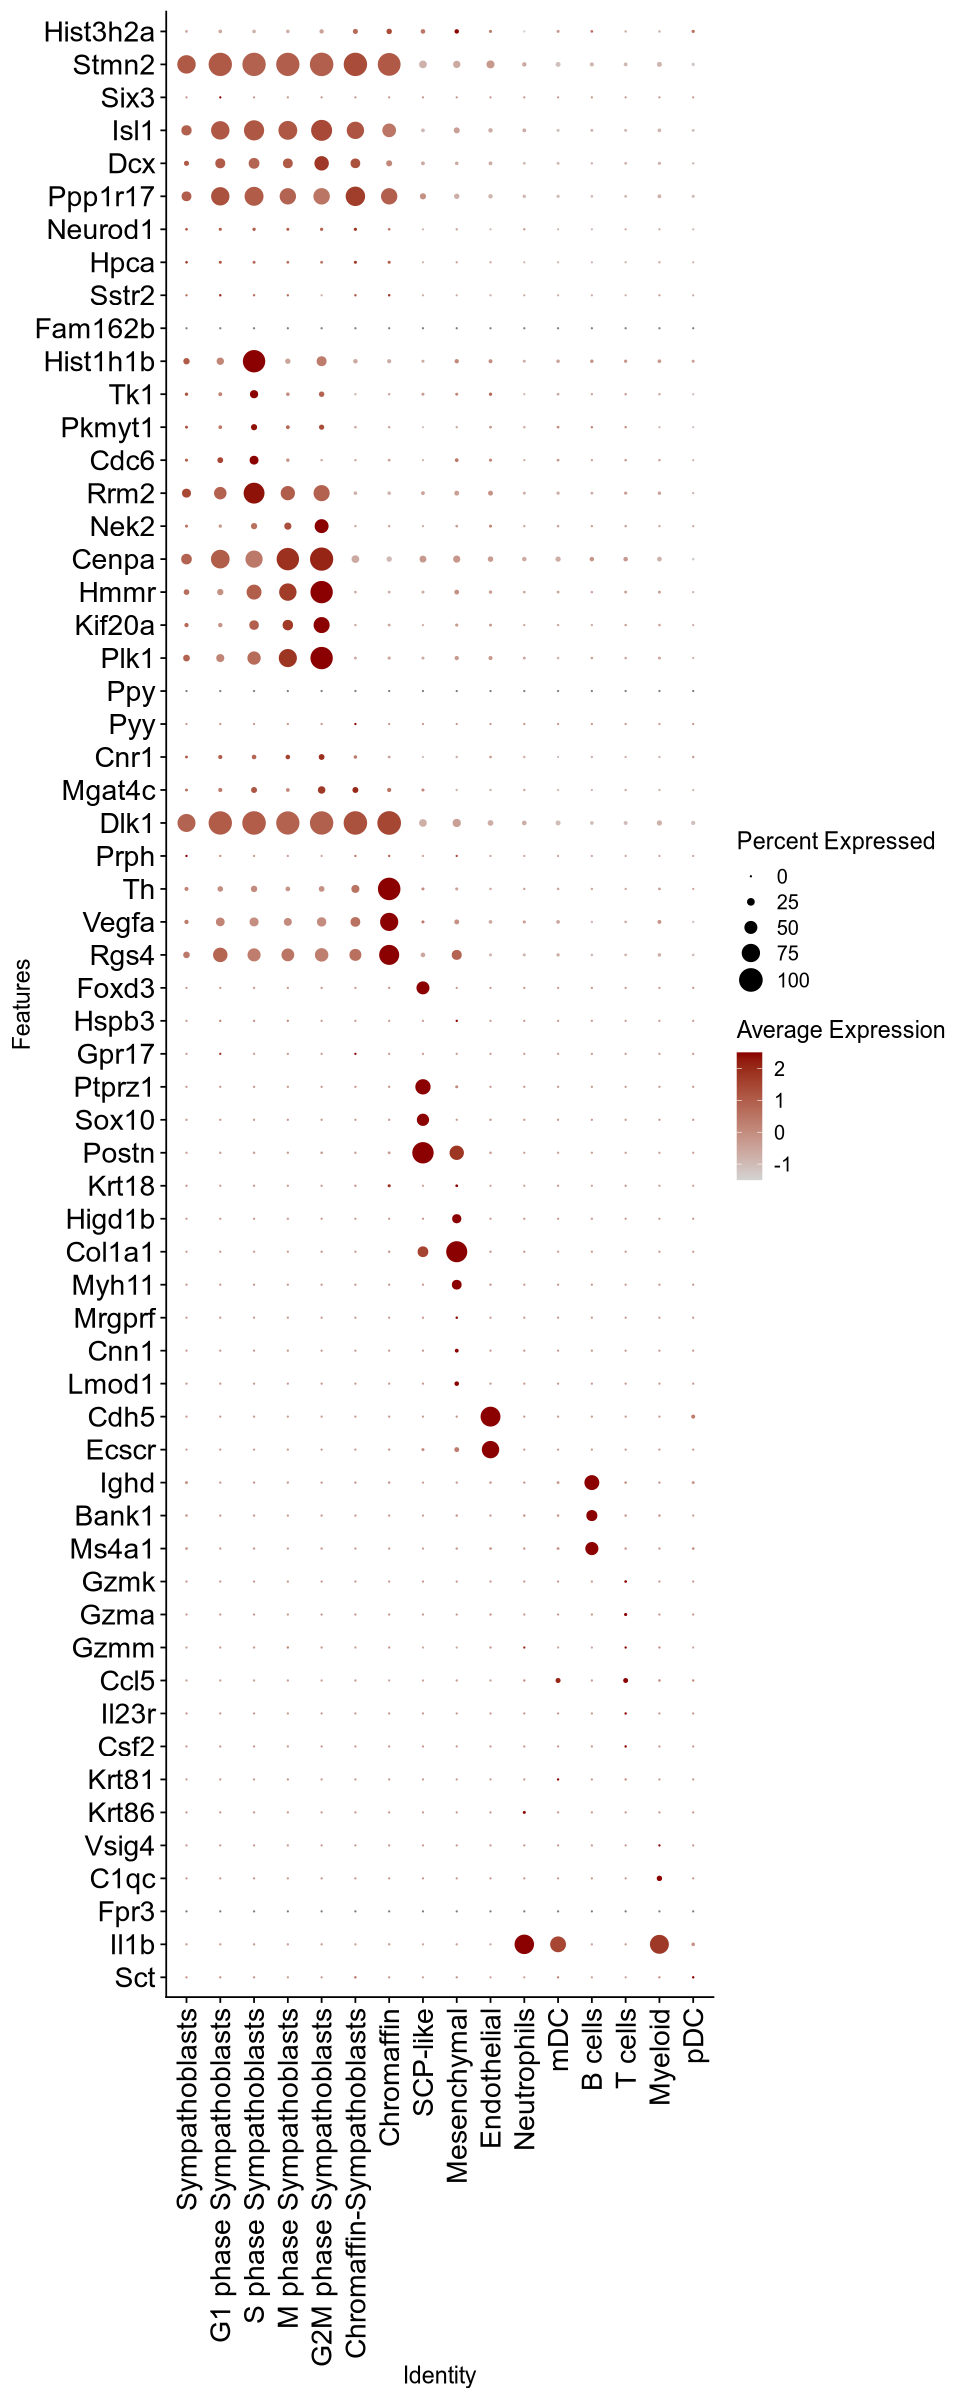

In [306]:
fig.size(20,8)
phomo = DotPlot(
        homo_copy, 
        assay='RNA',
        features = intersect(
                unique(sig_df$Features) %>% str_to_title,
                homo %>% rownames
                
            ) %>% rev, 
        group.by='annot.new', 
        cols = c("lightgrey", "darkred"))+
         coord_flip()+theme(
             axis.text.x = element_text(
                 angle = 90, hjust=1, vjust=0.5,
             size=17),
             axis.text.y = element_text(
             size=17)
         )
phomo

In [295]:
hemi_copy = hemi

In [296]:
hemi_copy$annot.new = factor(
    hemi_copy$annot.new, levels=homo_rearranged)

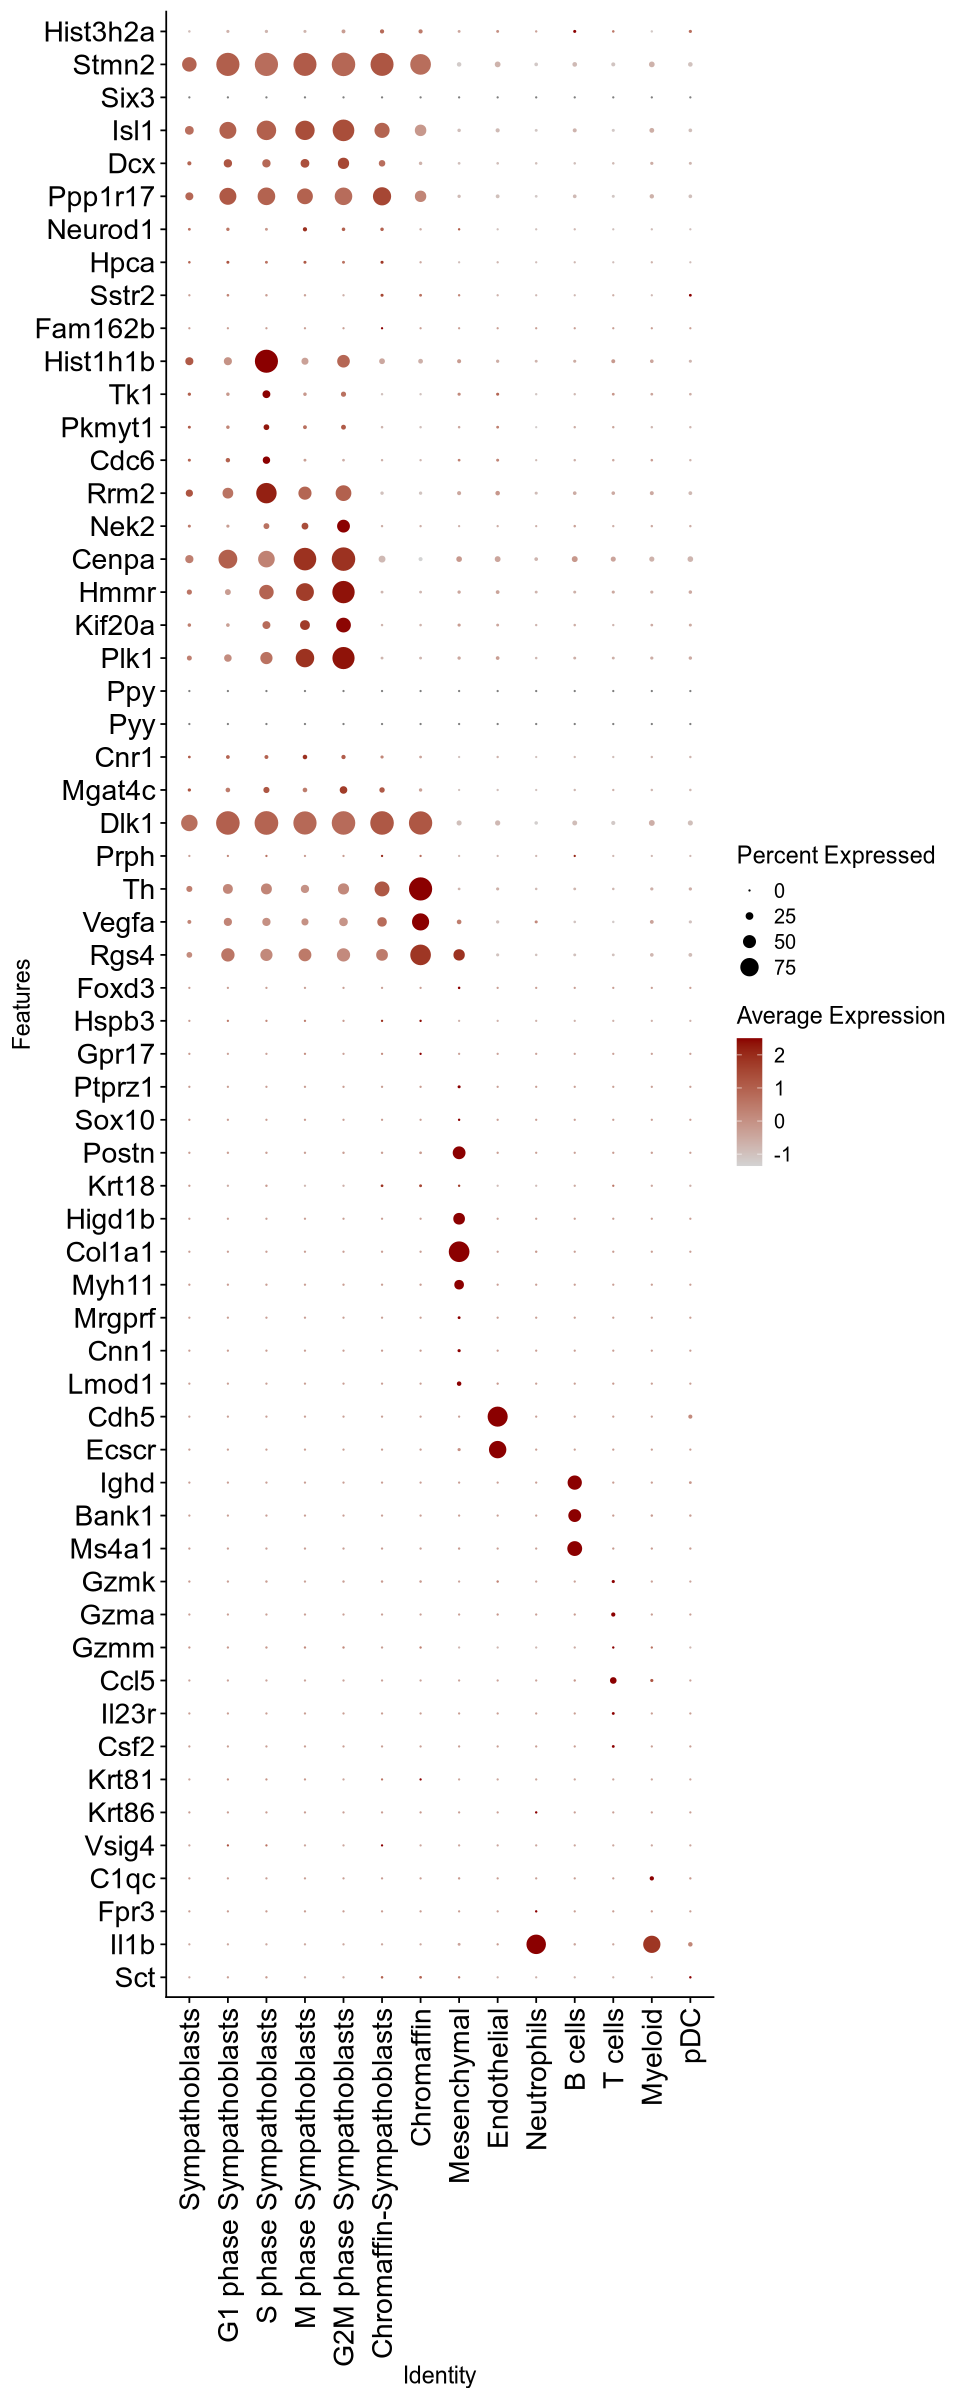

In [305]:
fig.size(20,8)
phemi = DotPlot(
        hemi_copy, 
        assay='RNA',
        features = intersect(
                unique(sig_df$Features) %>% str_to_title,
                hemi %>% rownames
                
            ) %>% rev, 
        group.by='annot.new', 
        cols = c("lightgrey", "darkred"))+
         coord_flip()+theme(
             axis.text.x = element_text(
                 angle = 90, hjust=1, vjust=0.5,
             size=17),
             axis.text.y = element_text(
             size=17)
         )
phemi

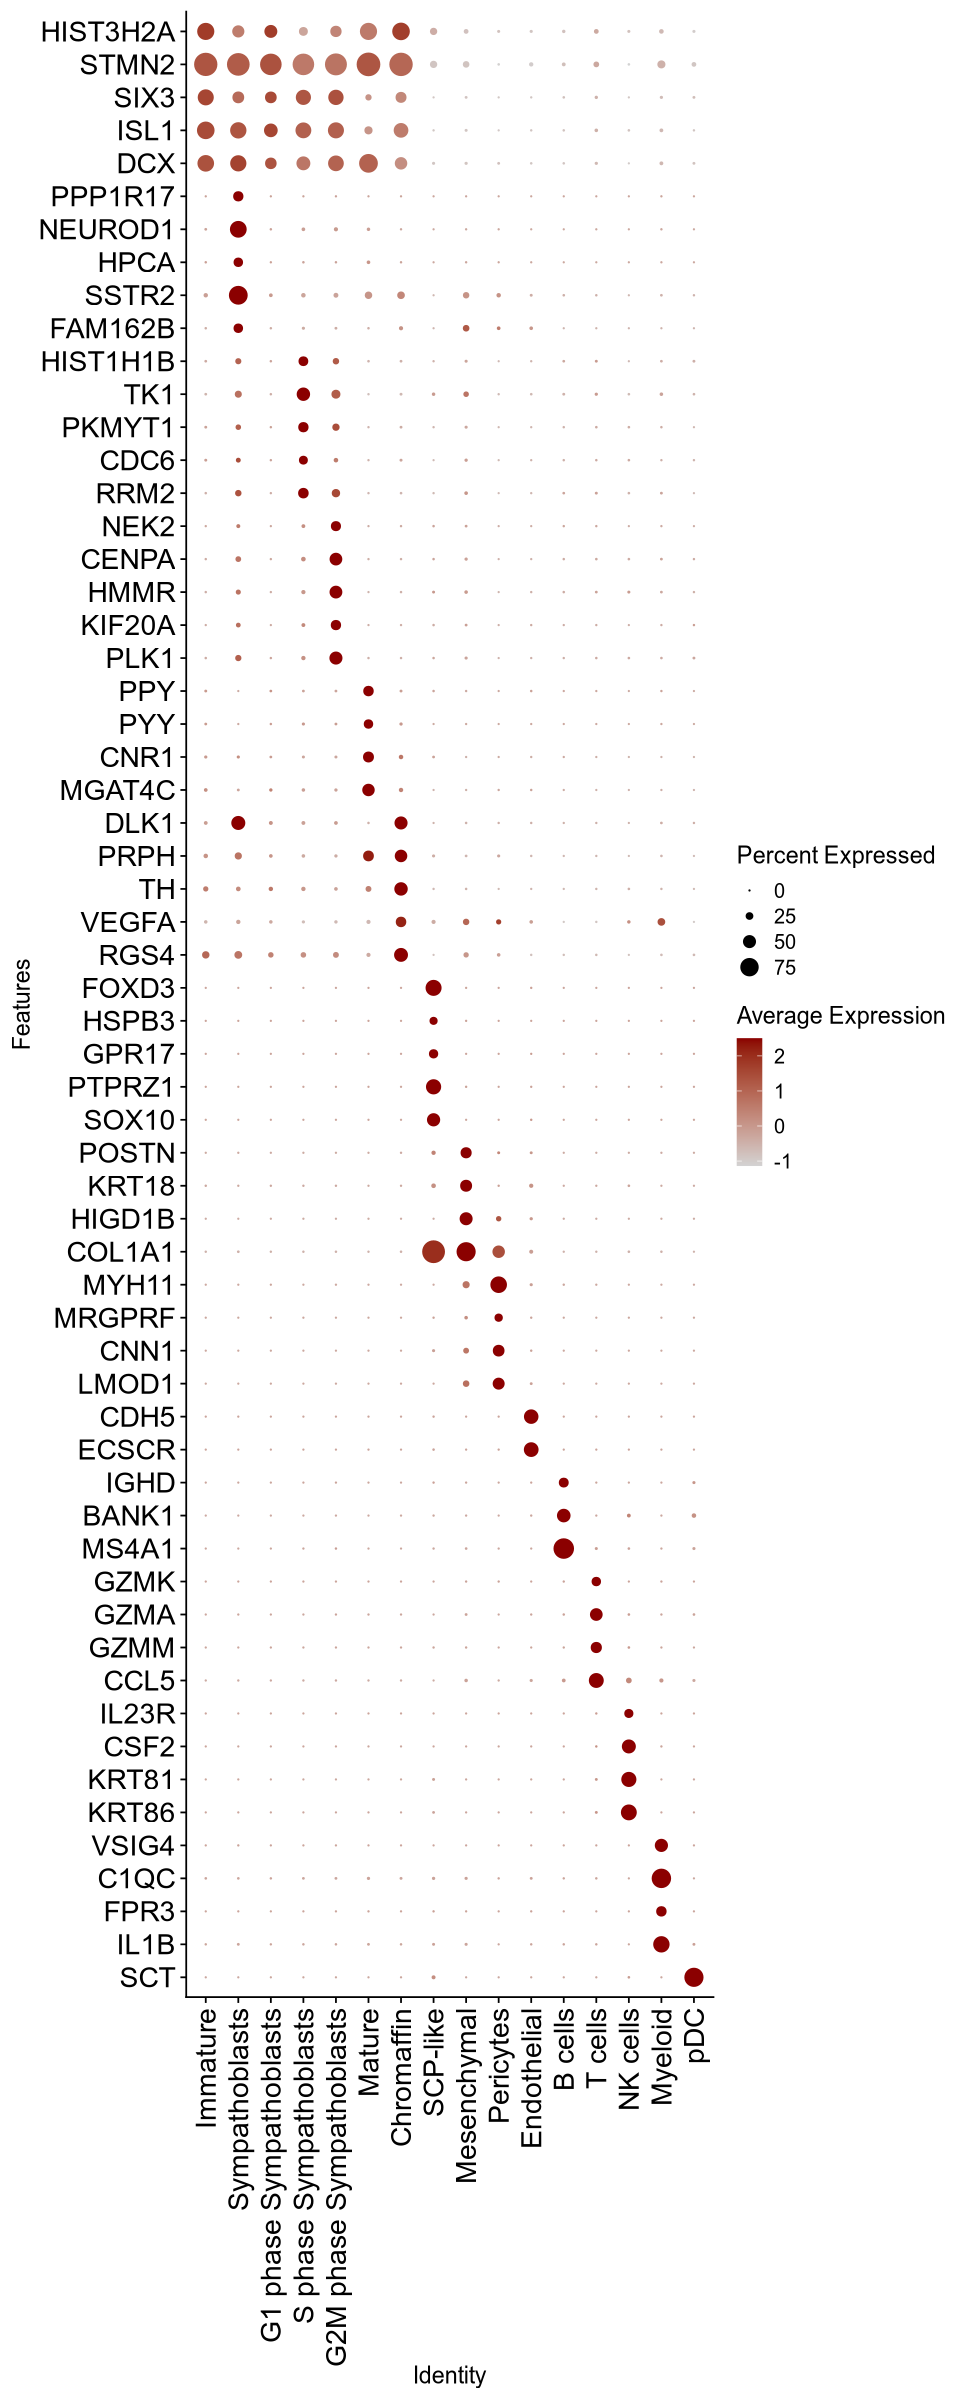

In [304]:
fig.size(20,8)
longdotplot = DotPlot(
    seurat_obj, 
        assay='RNA',
        features = intersect(
                unique(sig_df$Features) %>% str_to_title,
                hemi %>% rownames   
            ) %>% str_to_upper %>% rev, 
        group.by='annot.new', 
        cols = c("lightgrey", "darkred"))+
         coord_flip()+theme(
             axis.text.x = element_text(
                 angle = 90, hjust=1, vjust=0.5,
             size=17),
             axis.text.y = element_text(
             size=17)
         )
longdotplot

In [317]:
phomo_no_axis = phomo + theme(
    axis.text.y = element_blank(),  # Remove y-axis labels
         axis.title.y = element_blank(), # Remove y-axis title
    legend.position = "none"
)
phemi_no_axis = phemi + theme(
    axis.text.y = element_blank(),  # Remove y-axis labels
         axis.title.y = element_blank()  # Remove y-axis title
)

In [312]:
library(cowplot)
library(patchwork)


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




In [318]:
combined_plot <-  longdotplot + theme(legend.position="none") + phomo_no_axis + phemi_no_axis 
  plot_layout(guides = "collect") & 
  theme(legend.position = "right")

NULL

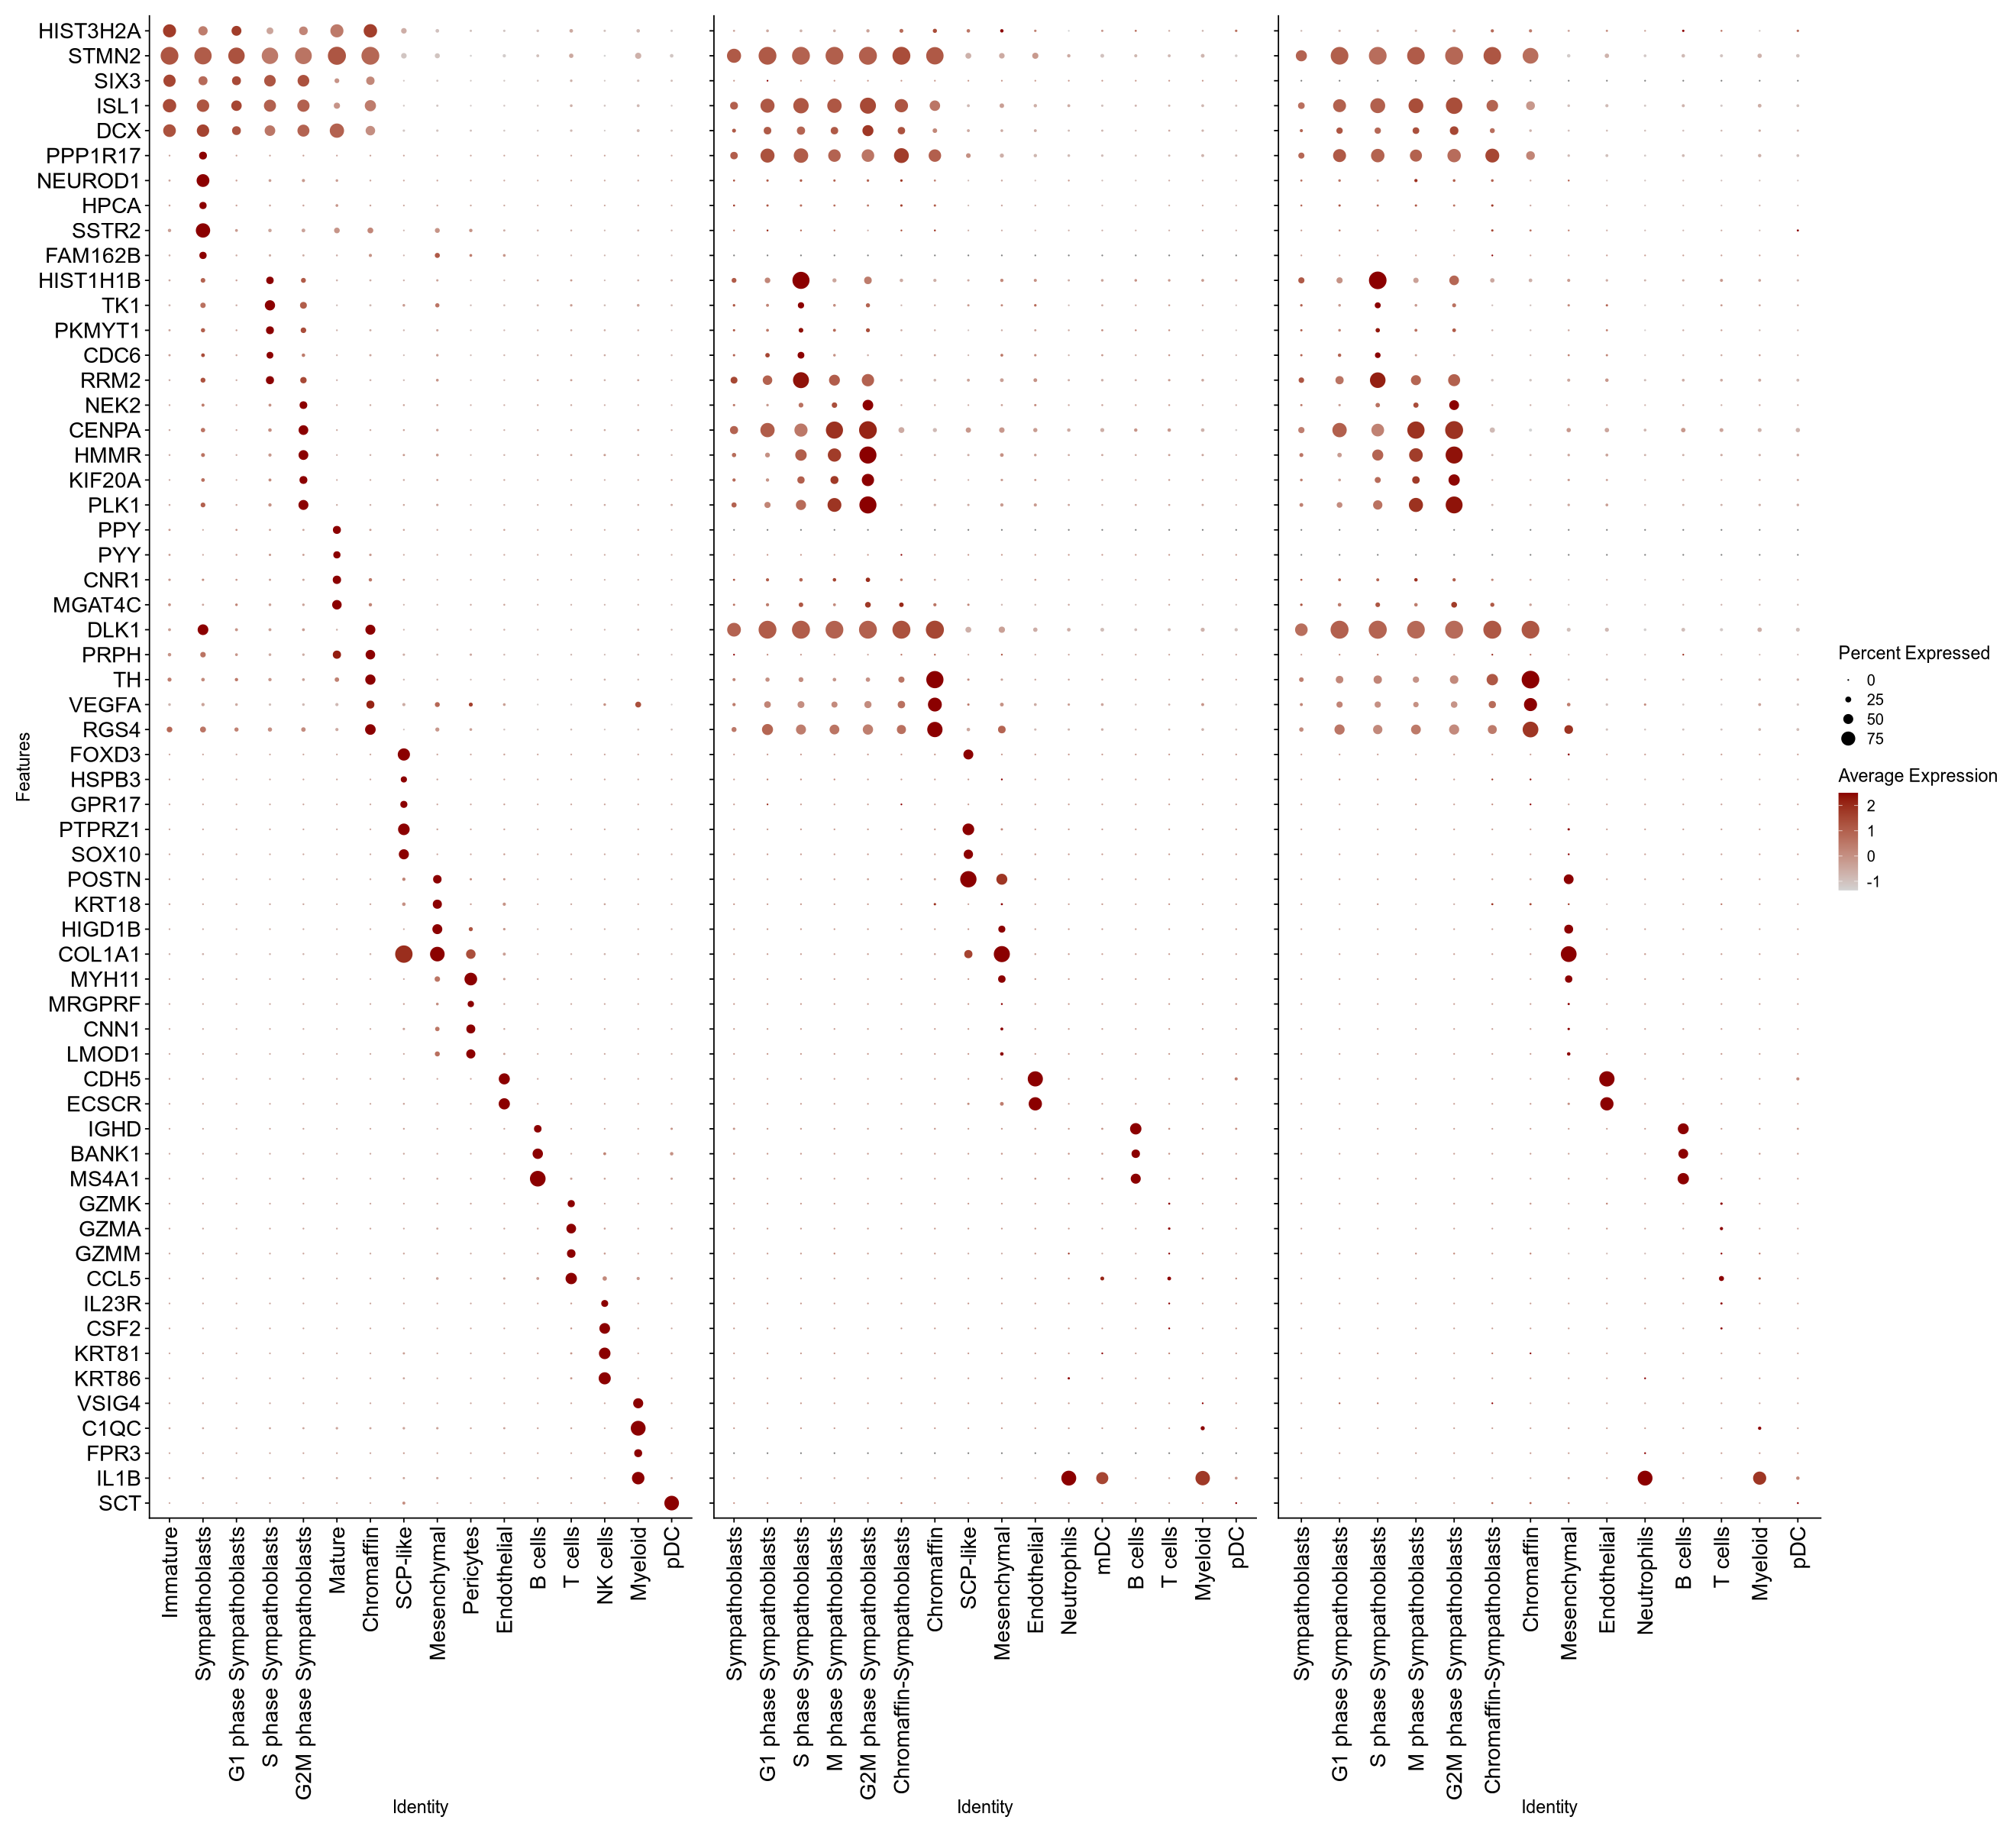

In [322]:
fig.size(20,22)
combined_plot

In [324]:
ggsave(
     glue::glue('/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/',
    'results/figures/2024/Figure_3/Figure_3D_comparison_dotplot.pdf'),
    plot =combined_plot, 
    height = 20,
    width = 18,
    create.dir=TRUE
      )


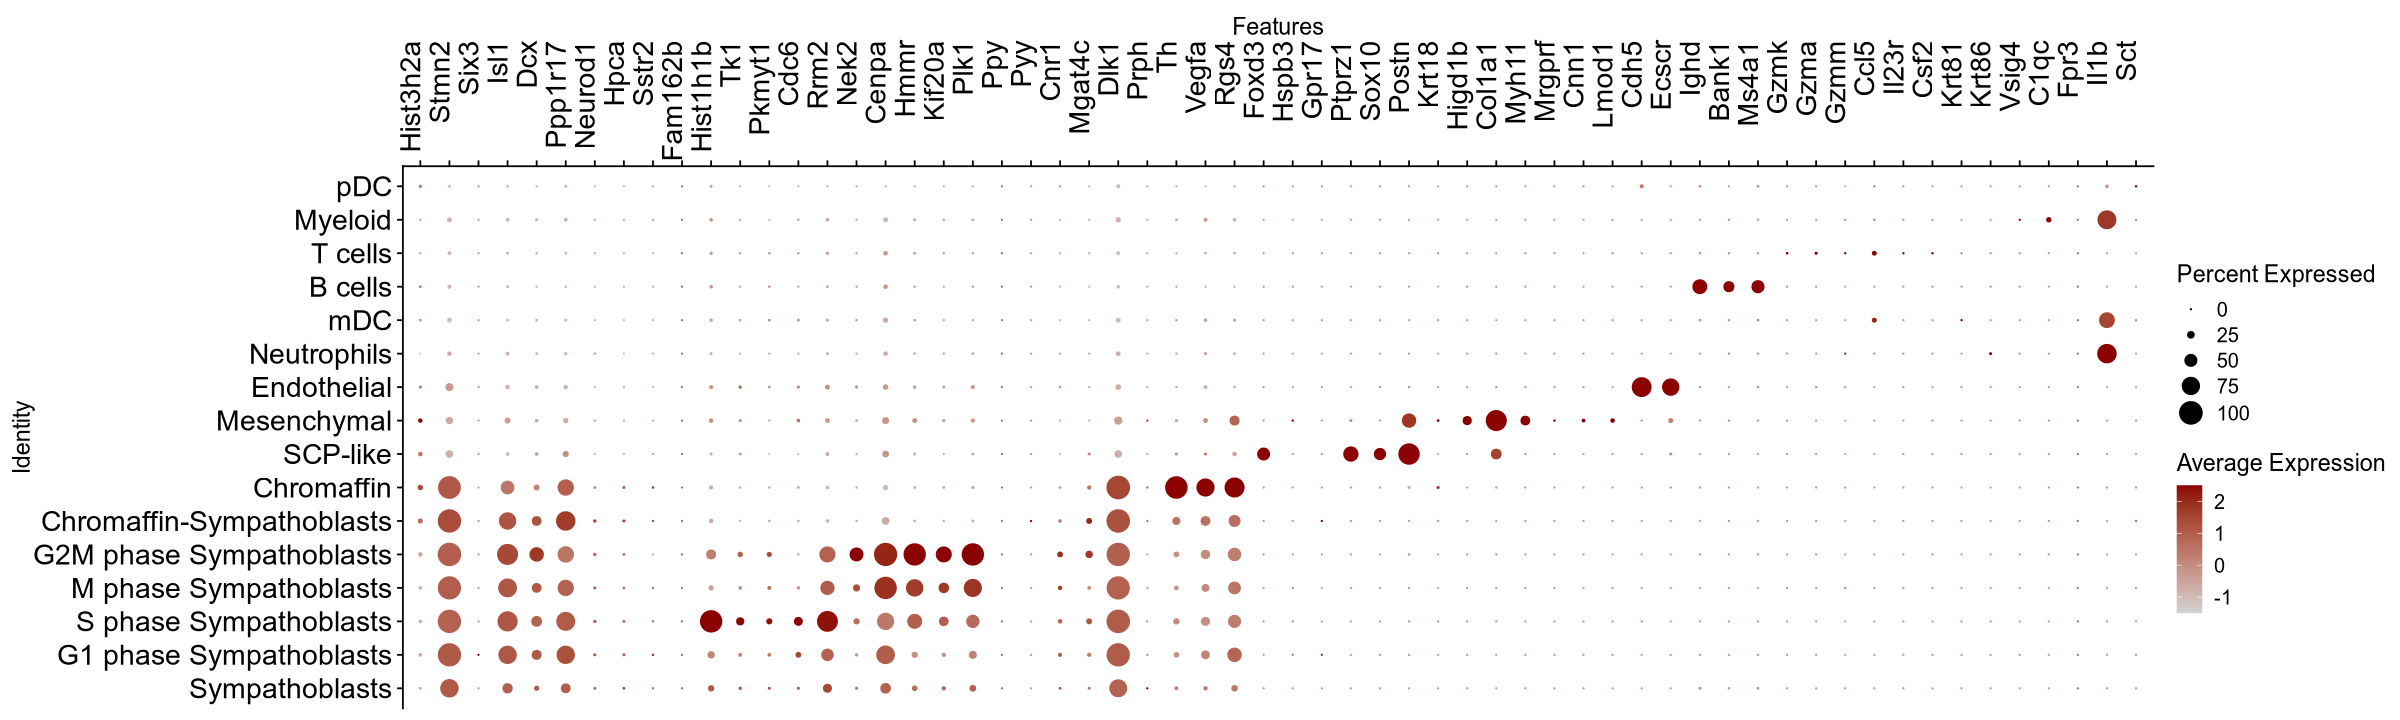

In [358]:
fig.size(6,20)
phomo = DotPlot(
        homo_copy, 
        assay='RNA',
        features = intersect(
                unique(sig_df$Features) %>% str_to_title,
                homo %>% rownames
                
            ) , 
        group.by='annot.new', 
        cols = c("lightgrey", "darkred"))+
scale_x_discrete(position = "top")+
         theme(
             axis.text.x = element_text(
                 angle = 90, hjust=1, vjust=0.5,
             size=17),
             axis.text.y = element_text(
             size=17)
         )
phomo

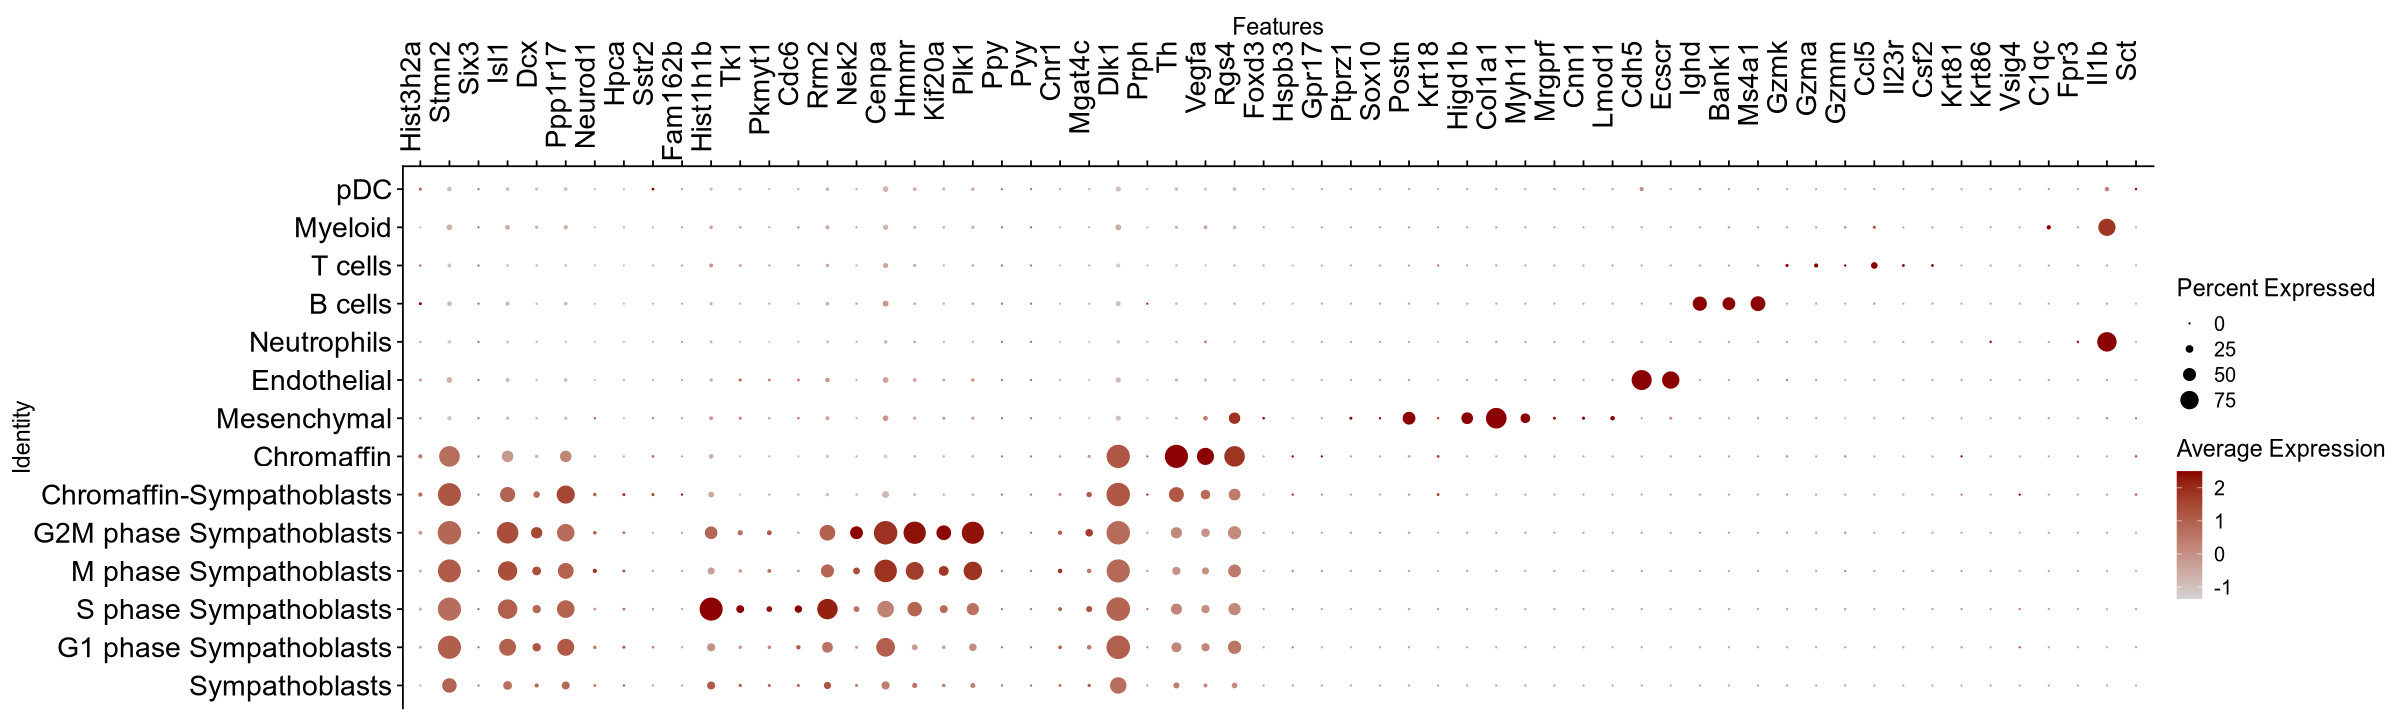

In [359]:
fig.size(6,20)
phemi = DotPlot(
        hemi_copy, 
        assay='RNA',
        features = intersect(
                unique(sig_df$Features) %>% str_to_title,
                homo %>% rownames
                
            ) , 
        group.by='annot.new', 
        cols = c("lightgrey", "darkred"))+
        scale_x_discrete(position = "top")+
         theme(
             axis.text.x = element_text(
                 angle = 90, hjust=1, vjust=0.5,
             size=17),
             axis.text.y = element_text(
             size=17)
         )
phemi

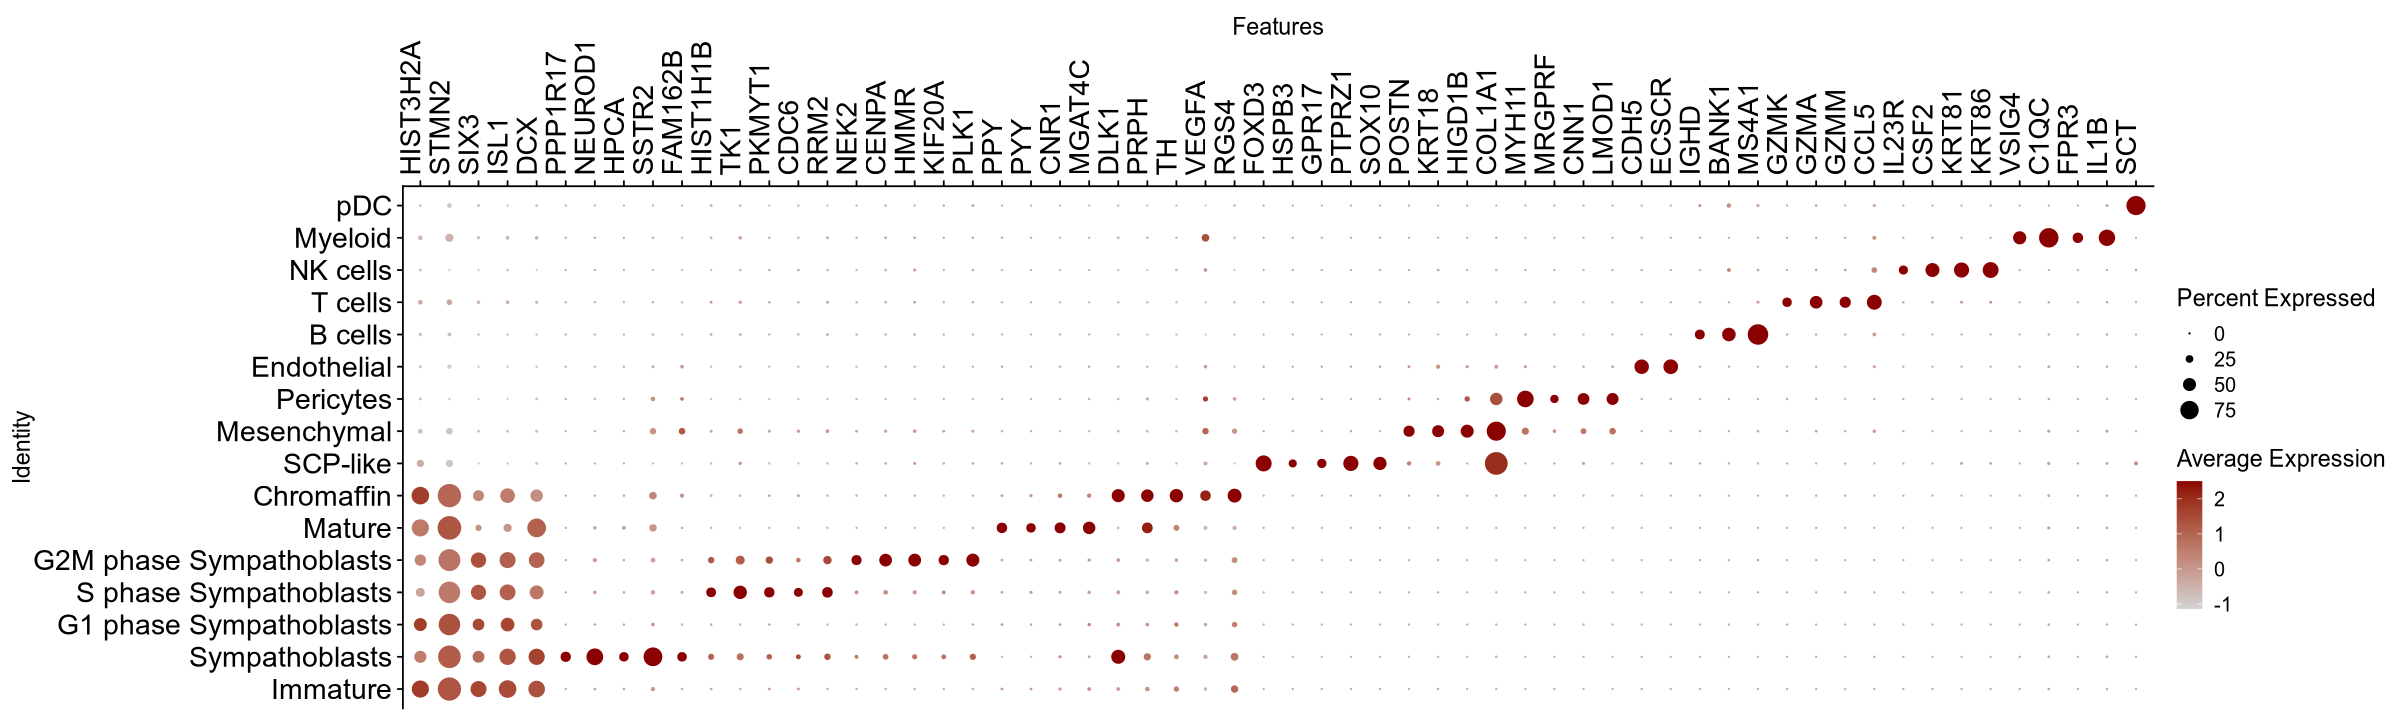

In [360]:
fig.size(6,20)
longdotplot = DotPlot(
    seurat_obj, 
        assay='RNA',
        features = intersect(
                unique(sig_df$Features) %>% str_to_title,
                hemi %>% rownames   
            ) %>% str_to_upper, 
        group.by='annot.new', 
        cols = c("lightgrey", "darkred"))+
scale_x_discrete(position = "top")+
         theme(
             axis.text.x = element_text(
                 angle = 90, hjust=0,vjust=0.5,
             size=17,margin = margin(l = 10)),
             axis.text.y = element_text(
             size=17)
         )
longdotplot

In [364]:
phomo_no_axis = phomo + theme(
    axis.text.x = element_blank(),  # Remove y-axis labels
         axis.title.x = element_blank() # Remove y-axis titl
)
phemi_no_axis = phemi + theme(
    axis.text.x = element_blank(),  # Remove y-axis labels
         axis.title.x = element_blank()  # Remove y-axis title
)

In [365]:
combined_plot <-  longdotplot  / phomo_no_axis / phemi_no_axis 
  plot_layout(guides = "collect") & 
  theme(legend.position = "right")

NULL

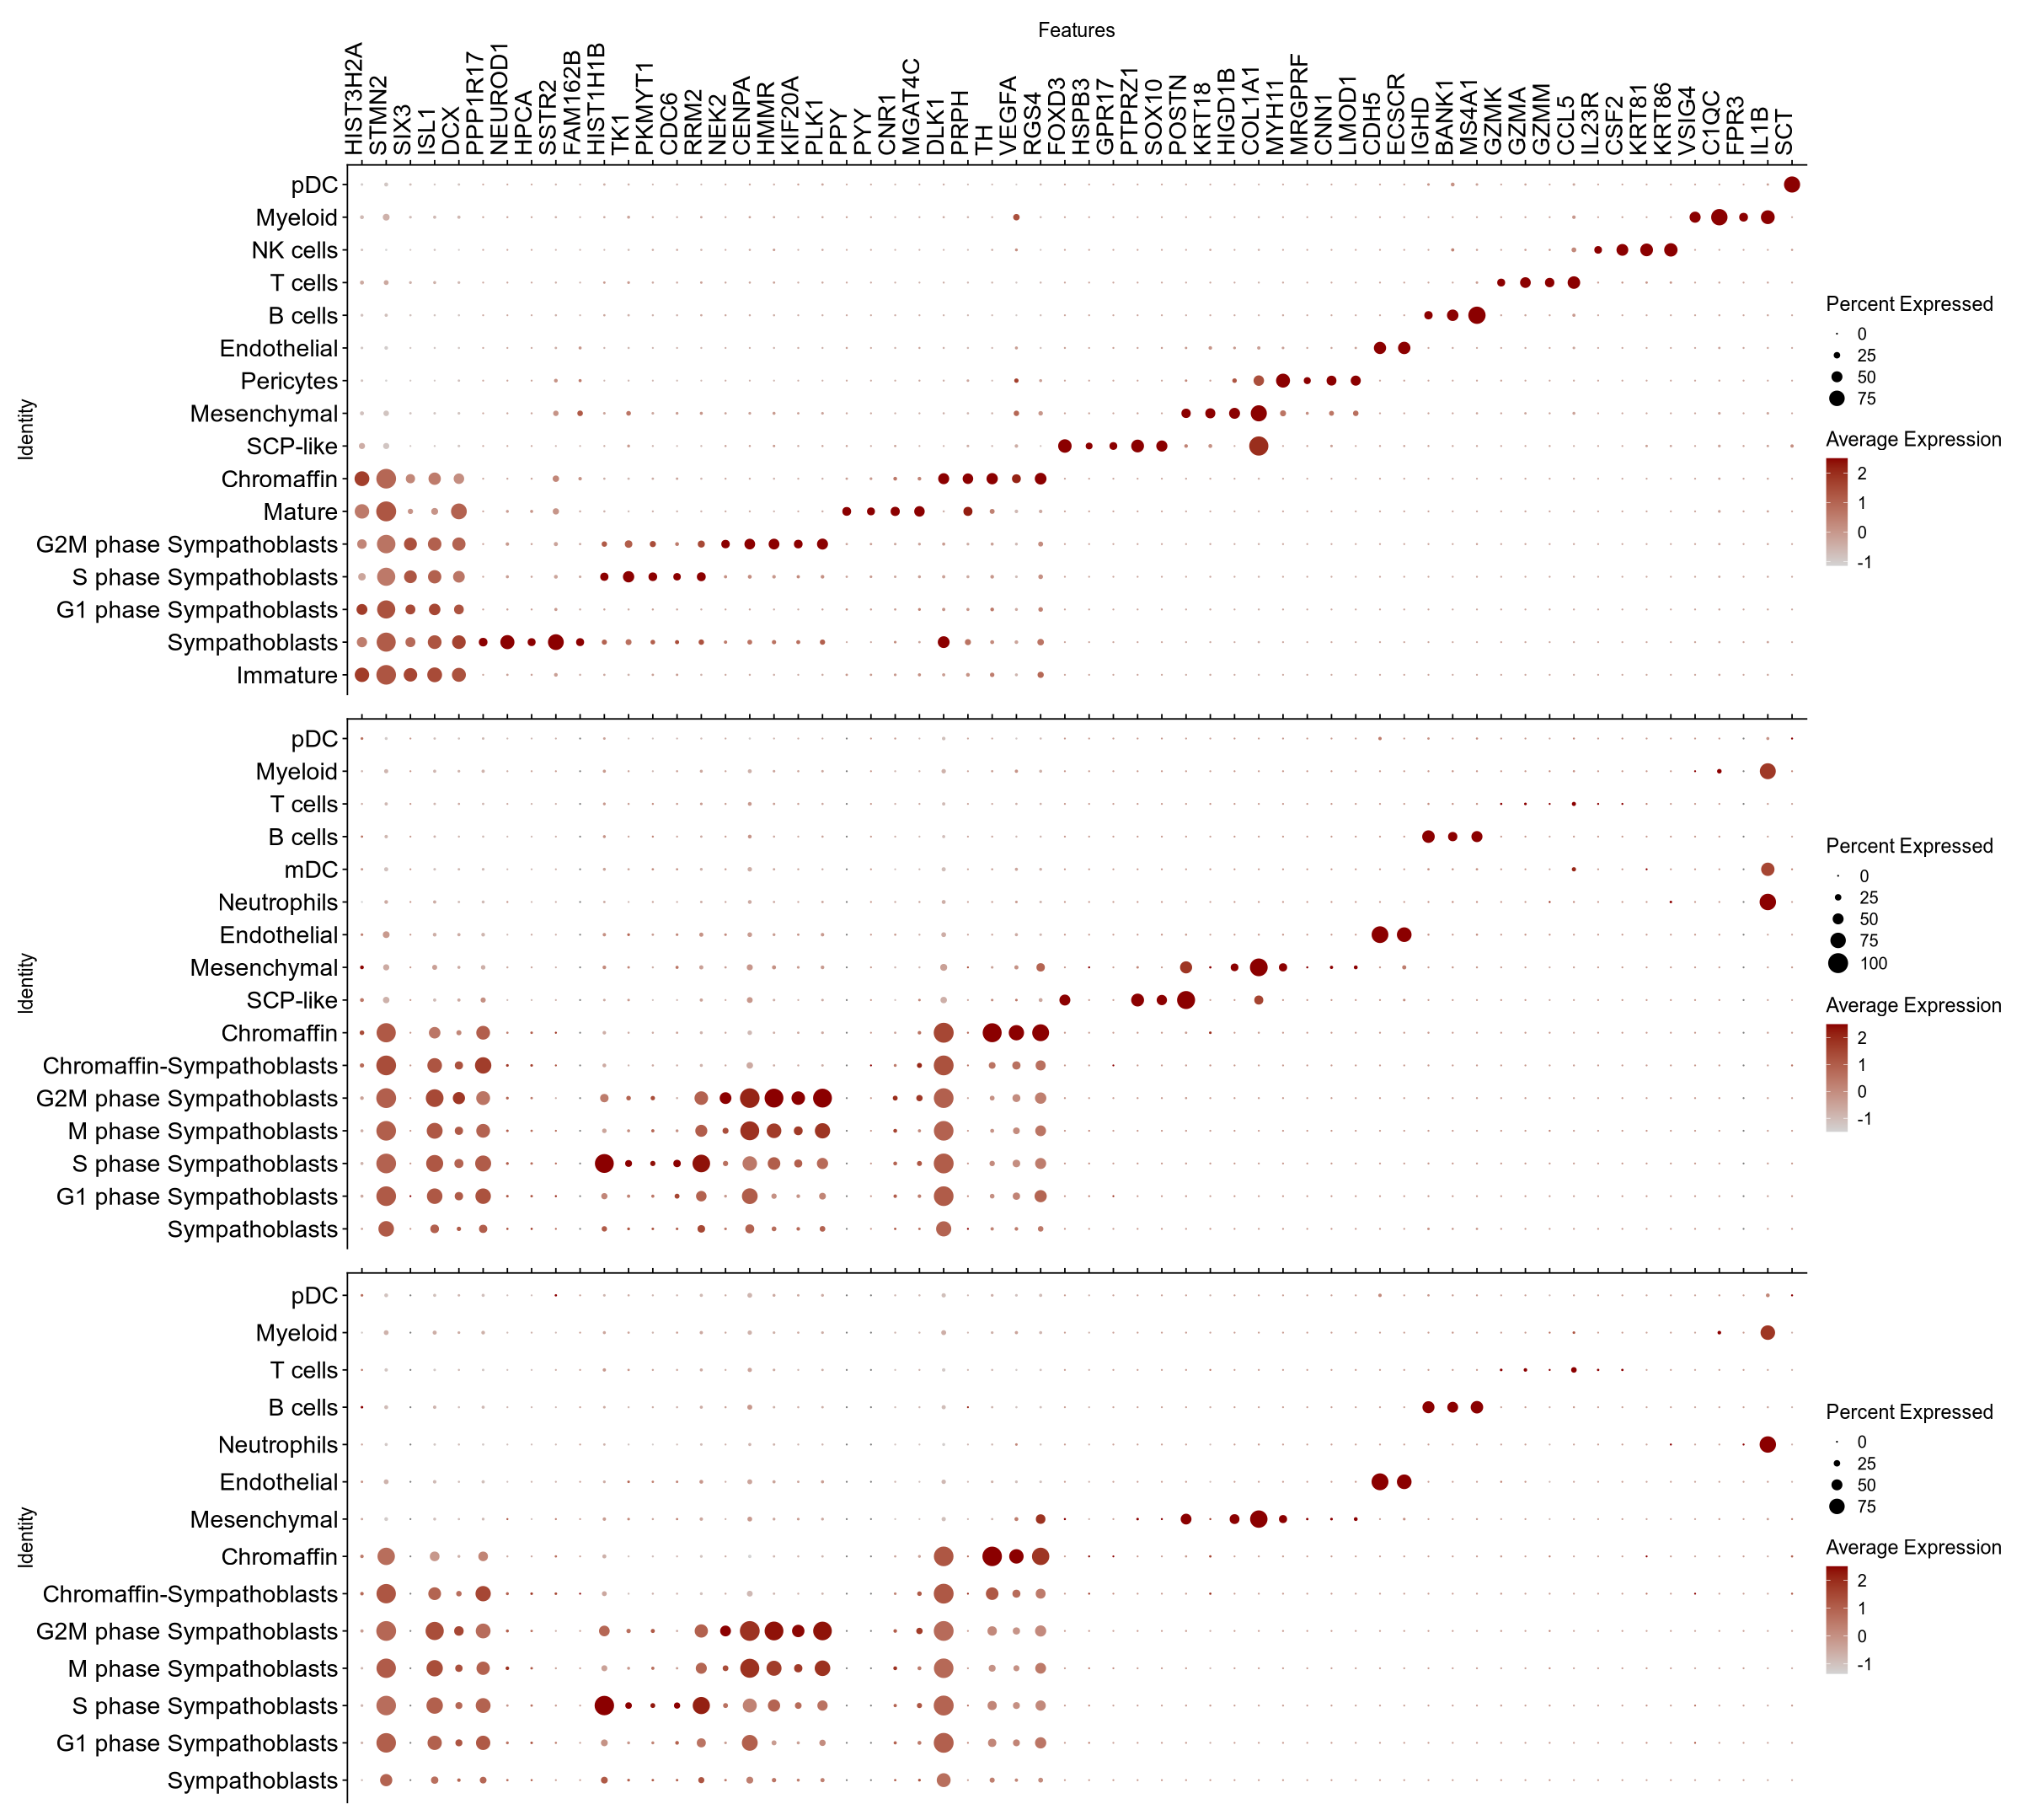

In [366]:
fig.size(18,20)
combined_plot

In [367]:
ggsave(
     glue::glue('/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/',
    'results/figures/2024/Figure_3/Figure_3D_comparison_dotplot_vertical.pdf'),
    plot =combined_plot, 
    height = 18,
    width = 20,
    create.dir=TRUE
      )


In [235]:
unique(sig_df$Features) %>% length

[1] 75

In [299]:
new_ortho_list = new_ortho$m_name
names(new_ortho_list) = new_ortho$h_name

In [300]:
new_ortho_list %>% head

GDNF     STAR     FZD2   HOXA11   HOXC11   SPTBN5 
  "Gdnf"   "Star"   "Fzd2" "Hoxa11" "Hoxc11" "Sptbn5"

In [302]:
union(
    
na.omit(new_ortho_list[unique(sig_df$Features)]) %>% as.vector

[1] "Stmn2"   "Six3"    "Isl1"    "Dcx"     "Ppp1r17" "Neurod1" "Hpca"   
 [8] "Sstr2"   "Fam162b" "Tk1"     "Pkmyt1"  "Cdc6"    "Rrm2"    "Nek2"   
[15] "Cenpa"   "Hmmr"    "Kif20a"  "Plk1"    "Ppy"     "Pyy"     "Cnr1"   
[22] "Mgat4c"  "Dlk1"    "Prph"    "Th"      "Vegfa"   "Rgs4"    "Foxd3"  
[29] "Hspb3"   "Gpr17"   "Ptprz1"  "Sox10"   "Postn"   "Krt18"   "Higd1b" 
[36] "Col1a1"  "Myh11"   "Mrgprf"  "Cnn1"    "Lmod1"   "Cdh5"    "Ecscr"  
[43] "Ighd"    "Bank1"   "Fcer2a"  "Ms4a1"   "Gzmb"    "Gzmk"    "Gzma"   
[50] "Gzmm"    "Ccl5"    "Il23r"   "Csf2"    "Krt81"   "Krt87"   "Fcgr1"  
[57] "Vsig4"   "C1qc"    "Fpr3"    "Il1b"    "Clec4b1" "Pira2"   "Sct"

In [246]:
unique(sig_df$Features)

[1] "HIST3H2A"   "STMN2"      "SIX3"       "ISL1"       "DCX"       
 [6] "PPP1R17"    "NEUROD1"    "HPCA"       "SSTR2"      "FAM162B"   
[11] "HIST1H1B"   "TK1"        "PKMYT1"     "CDC6"       "RRM2"      
[16] "NEK2"       "CENPA"      "HMMR"       "KIF20A"     "PLK1"      
[21] "PPY"        "PYY"        "AC004540.2" "CNR1"       "MGAT4C"    
[26] "DLK1"       "PRPH"       "TH"         "VEGFA"      "RGS4"      
[31] "FOXD3"      "HSPB3"      "GPR17"      "PTPRZ1"     "SOX10"     
[36] "SFTA1P"     "POSTN"      "KRT18"      "HIGD1B"     "COL1A1"    
[41] "MYH11"      "MRGPRF"     "CNN1"       "LMOD1"      "ADIRF"     
[46] "CDH5"       "FCN3"       "ECSCR"      "TM4SF18"    "CXorf36"   
[51] "IGHD"       "BANK1"      "FCER2"      "LINC02397"  "MS4A1"     
[56] "GZMH"       "GZMK"       "GZMA"       "GZMM"       "CCL5"      
[61] "LINC00299"  "IL23R"      "CSF2"       "KRT81"      "KRT86"     
[66] "FCGR1A"     "VSIG4"      "C1QC"       "FPR3"       "IL1B"      
[71] "AC097375.1" "CLEC4C"     "LILRA4"     "SCT"        "RHEX"

In [247]:
setdiff(
    na.omit(new_ortho_list[unique(sig_df$Features)]) ,
    intersect(
        unique(sig_df$Features) %>% str_to_title,
        homo %>% rownames    
    )
    )
    

[1] "Fcer2a"  "Gzmb"    "Krt87"   "Fcgr1"   "Clec4b1" "Pira2"

In [370]:
jensky_signature = openxlsx::read.xlsx(
    '20240814_Human-Adrenal-Gland-Signatures.xlsx'
)

In [372]:
gene_sets = split(jensky_signature$gene, jensky_signature$cluster)

In [386]:
jensky_signature$cluster %>% unique

[1] "late SCPs"                   "SCPs"                       
 [3] "cycling SCPs"                "Bridge"                     
 [5] "connecting Progenitor cells" "Chromaffin cells"           
 [7] "late Chromaffin cells"       "Neuroblasts"                
 [9] "late Neuroblasts"            "cycling Neuroblasts"

In [374]:
seurat_obj$annot.new %>% levels

[1] "Immature"                 "Sympathoblasts"          
 [3] "G1 phase Sympathoblasts"  "S phase Sympathoblasts"  
 [5] "G2M phase Sympathoblasts" "Mature"                  
 [7] "Chromaffin"               "SCP-like"                
 [9] "Mesenchymal"              "Pericytes"               
[11] "Endothelial"              "B cells"                 
[13] "T cells"                  "NK cells"                
[15] "Myeloid"                  "pDC"

In [375]:
names(gene_sets)

[1] "Bridge"                      "Chromaffin cells"           
 [3] "connecting Progenitor cells" "cycling Neuroblasts"        
 [5] "cycling SCPs"                "late Chromaffin cells"      
 [7] "late Neuroblasts"            "late SCPs"                  
 [9] "Neuroblasts"                 "SCPs"

In [389]:
seurat_obj_scores = AddModuleScore(
    object = seurat_obj,
    features = gene_sets[jensky_signature$cluster %>% unique],
    name = paste0('Jansky_',jensky_signature$cluster %>% unique)
)

Warning message:
“The following features are not present in the object: RP11-308N19.1, RP11-242P2.1, GPR126, RP11-776H12.1, LINC00478, C10orf11, PPAP2A, CTD-3088G3.8, RP11-436K8.1, WBSCR17, KIRREL, RP11-141M1.3, FAM134B, RP11-366L20.2, GAREM, RP11-307P5.1, GPR98, LEPREL1, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: RP11-152K4.2, GPR126, RP11-436K8.1, RP11-366L20.2, RP11-776H12.1, TMEM2, RP11-413B19.2, SGK223, RP11-366L20.3, KIRREL, GAREM, PPAP2A, LINC00478, RP11-945C19.4, CTD-3088G3.8, RP11-649G15.2, RP11-696N14.1, RP11-444D3.1, CTD-2647L4.1, ERBB2IP, RP11-37B2.1, LPHN2, LINC01057, C10orf11, KIAA0922, RP11-242P2.1, RP11-141M1.3, RP11-123O10.4, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: GPR126, RP11-152K4.2, RP11-366L20.2, LINC00669, RP11-436K8.1, CASC5, SGOL1, RP11-366L20.3, SGK223, RP11-776H12.1, SGOL2, RP11-120D5.1, RP11-413B19.2, KIRREL, AC004158.2, AP001347

In [390]:
seurat_obj_scores@meta.data %>% colnames

[1] "orig.ident"                                 
 [2] "nCount_RNA"                                 
 [3] "nFeature_RNA"                               
 [4] "percent.mt"                                 
 [5] "scDblFinder.class"                          
 [6] "scDblFinder.score"                          
 [7] "integrated_snn_res.0.2"                     
 [8] "integrated_snn_res.0.4"                     
 [9] "integrated_snn_res.0.5"                     
[10] "integrated_snn_res.0.6"                     
[11] "seurat_clusters"                            
[12] "annot"                                      
[13] "HALLMARK_DNA_REPAIR1"                       
[14] "HALLMARK_E2F_TARGETS2"                      
[15] "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION3"
[16] "HALLMARK_HEDGEHOG_SIGNALING4"               
[17] "HALLMARK_INFLAMMATORY_RESPONSE5"            
[18] "HALLMARK_KRAS_SIGNALING_DN6"                
[19] "HALLMARK_KRAS_SIGNALING_UP7"                
[20] "HALLMARK_MYC_TARGETS_V18"                   
[21] "HALLMARK_MYC_TARGETS_V29"                   
[22] "HALLMARK_NOTCH_SIGNALING10"                 
[23] "HALLMARK_P53_PATHWAY11"                     
[24] "HALLMARK_PI3K_AKT_MTOR_SIGNALING12"         
[25] "HALLMARK_TGF_BETA_SIGNALING13"              
[26] "HALLMARK_TNFA_SIGNALING_VIA_NFKB14"         
[27] "HALLMARK_WNT_BETA_CATENIN_SIGNALING15"      
[28] "MYCN1"                                      
[29] "MAPK2"                                      
[30] "annot.new"                                  
[31] "Jansky_late SCPs1"                          
[32] "Jansky_SCPs2"                               
[33] "Jansky_cycling SCPs3"                       
[34] "Jansky_Bridge4"                             
[35] "Jansky_connecting Progenitor cells5"        
[36] "Jansky_Chromaffin cells6"                   
[37] "Jansky_late Chromaffin cells7"              
[38] "Jansky_Neuroblasts8"                        
[39] "Jansky_late Neuroblasts9"                   
[40] "Jansky_cycling Neuroblasts10"

In [391]:
signature_columns = c(
    'Jansky_late SCPs1','Jansky_SCPs2','Jansky_cycling SCPs3','Jansky_Bridge4',
    'Jansky_connecting Progenitor cells5','Jansky_Chromaffin cells6','Jansky_late Chromaffin cells7',
    'Jansky_Neuroblasts8','Jansky_late Neuroblasts9','Jansky_cycling Neuroblasts10'

)

In [392]:
signature_scores <- FetchData(seurat_obj_scores, vars = signature_columns)

In [393]:
signature_scores %>% head

Jansky_late SCPs1 Jansky_SCPs2 Jansky_cycling SCPs3
AAACCCAAGATCCAAA.1_1  0.007246894       0.006358979 -0.033897118        
AAACCCAAGCACAAAT.1_1 -0.055285310      -0.053899700 -0.052932815        
AAACCCAAGCACTTTG.1_1 -0.070050306      -0.053432277 -0.004251984        
AAACCCAAGGCAGGGA.1_1 -0.048851483      -0.027220253 -0.055312949        
AAACCCACAACCCTCT.1_1 -0.038890440      -0.015844224  0.005595341        
AAACCCACAAGCCATT.1_1 -0.018966386      -0.019774503  0.071419868        
                     Jansky_Bridge4 Jansky_connecting Progenitor cells5
AAACCCAAGATCCAAA.1_1  0.091222995   0.11036641                         
AAACCCAAGCACAAAT.1_1  0.037542207   0.07849825                         
AAACCCAAGCACTTTG.1_1  0.044175662   0.08008703                         
AAACCCAAGGCAGGGA.1_1  0.021206091   0.05616044                         
AAACCCACAACCCTCT.1_1  0.009447848   0.08072620                         
AAACCCACAAGCCATT.1_1 -0.063762843   0.14091880                         
                     Jansky_Chromaffin cells6 Jansky_late Chromaffin cells7
AAACCCAAGATCCAAA.1_1  0.05586471               0.0543759612                
AAACCCAAGCACAAAT.1_1  0.01148326              -0.0007629076                
AAACCCAAGCACTTTG.1_1 -0.01621630              -0.0391283578                
AAACCCAAGGCAGGGA.1_1 -0.01186100               0.0308008399                
AAACCCACAACCCTCT.1_1 -0.00510825              -0.0445782188                
AAACCCACAAGCCATT.1_1 -0.02190423              -0.0261646509                
                     Jansky_Neuroblasts8 Jansky_late Neuroblasts9
AAACCCAAGATCCAAA.1_1  0.18600110         0.4855374               
AAACCCAAGCACAAAT.1_1  0.16290155         0.4837439               
AAACCCAAGCACTTTG.1_1  0.05942174         0.3427946               
AAACCCAAGGCAGGGA.1_1  0.12587776         0.5182147               
AAACCCACAACCCTCT.1_1  0.03623246         0.3845011               
AAACCCACAAGCCATT.1_1 -0.02844394         0.4059481               
                     Jansky_cycling Neuroblasts10
AAACCCAAGATCCAAA.1_1 -0.03379922                 
AAACCCAAGCACAAAT.1_1  0.02434309                 
AAACCCAAGCACTTTG.1_1  0.15869659                 
AAACCCAAGGCAGGGA.1_1 -0.04696762                 
AAACCCACAACCCTCT.1_1  0.12076438                 
AAACCCACAAGCCATT.1_1  0.36594573

In [394]:
DefaultAssay(seurat_obj_scores) = "RNA"

Warning message:
“Some of the plotted features are from meta.data slot.
• Please check that `na_cutoff` param is being set appropriately for those features.”


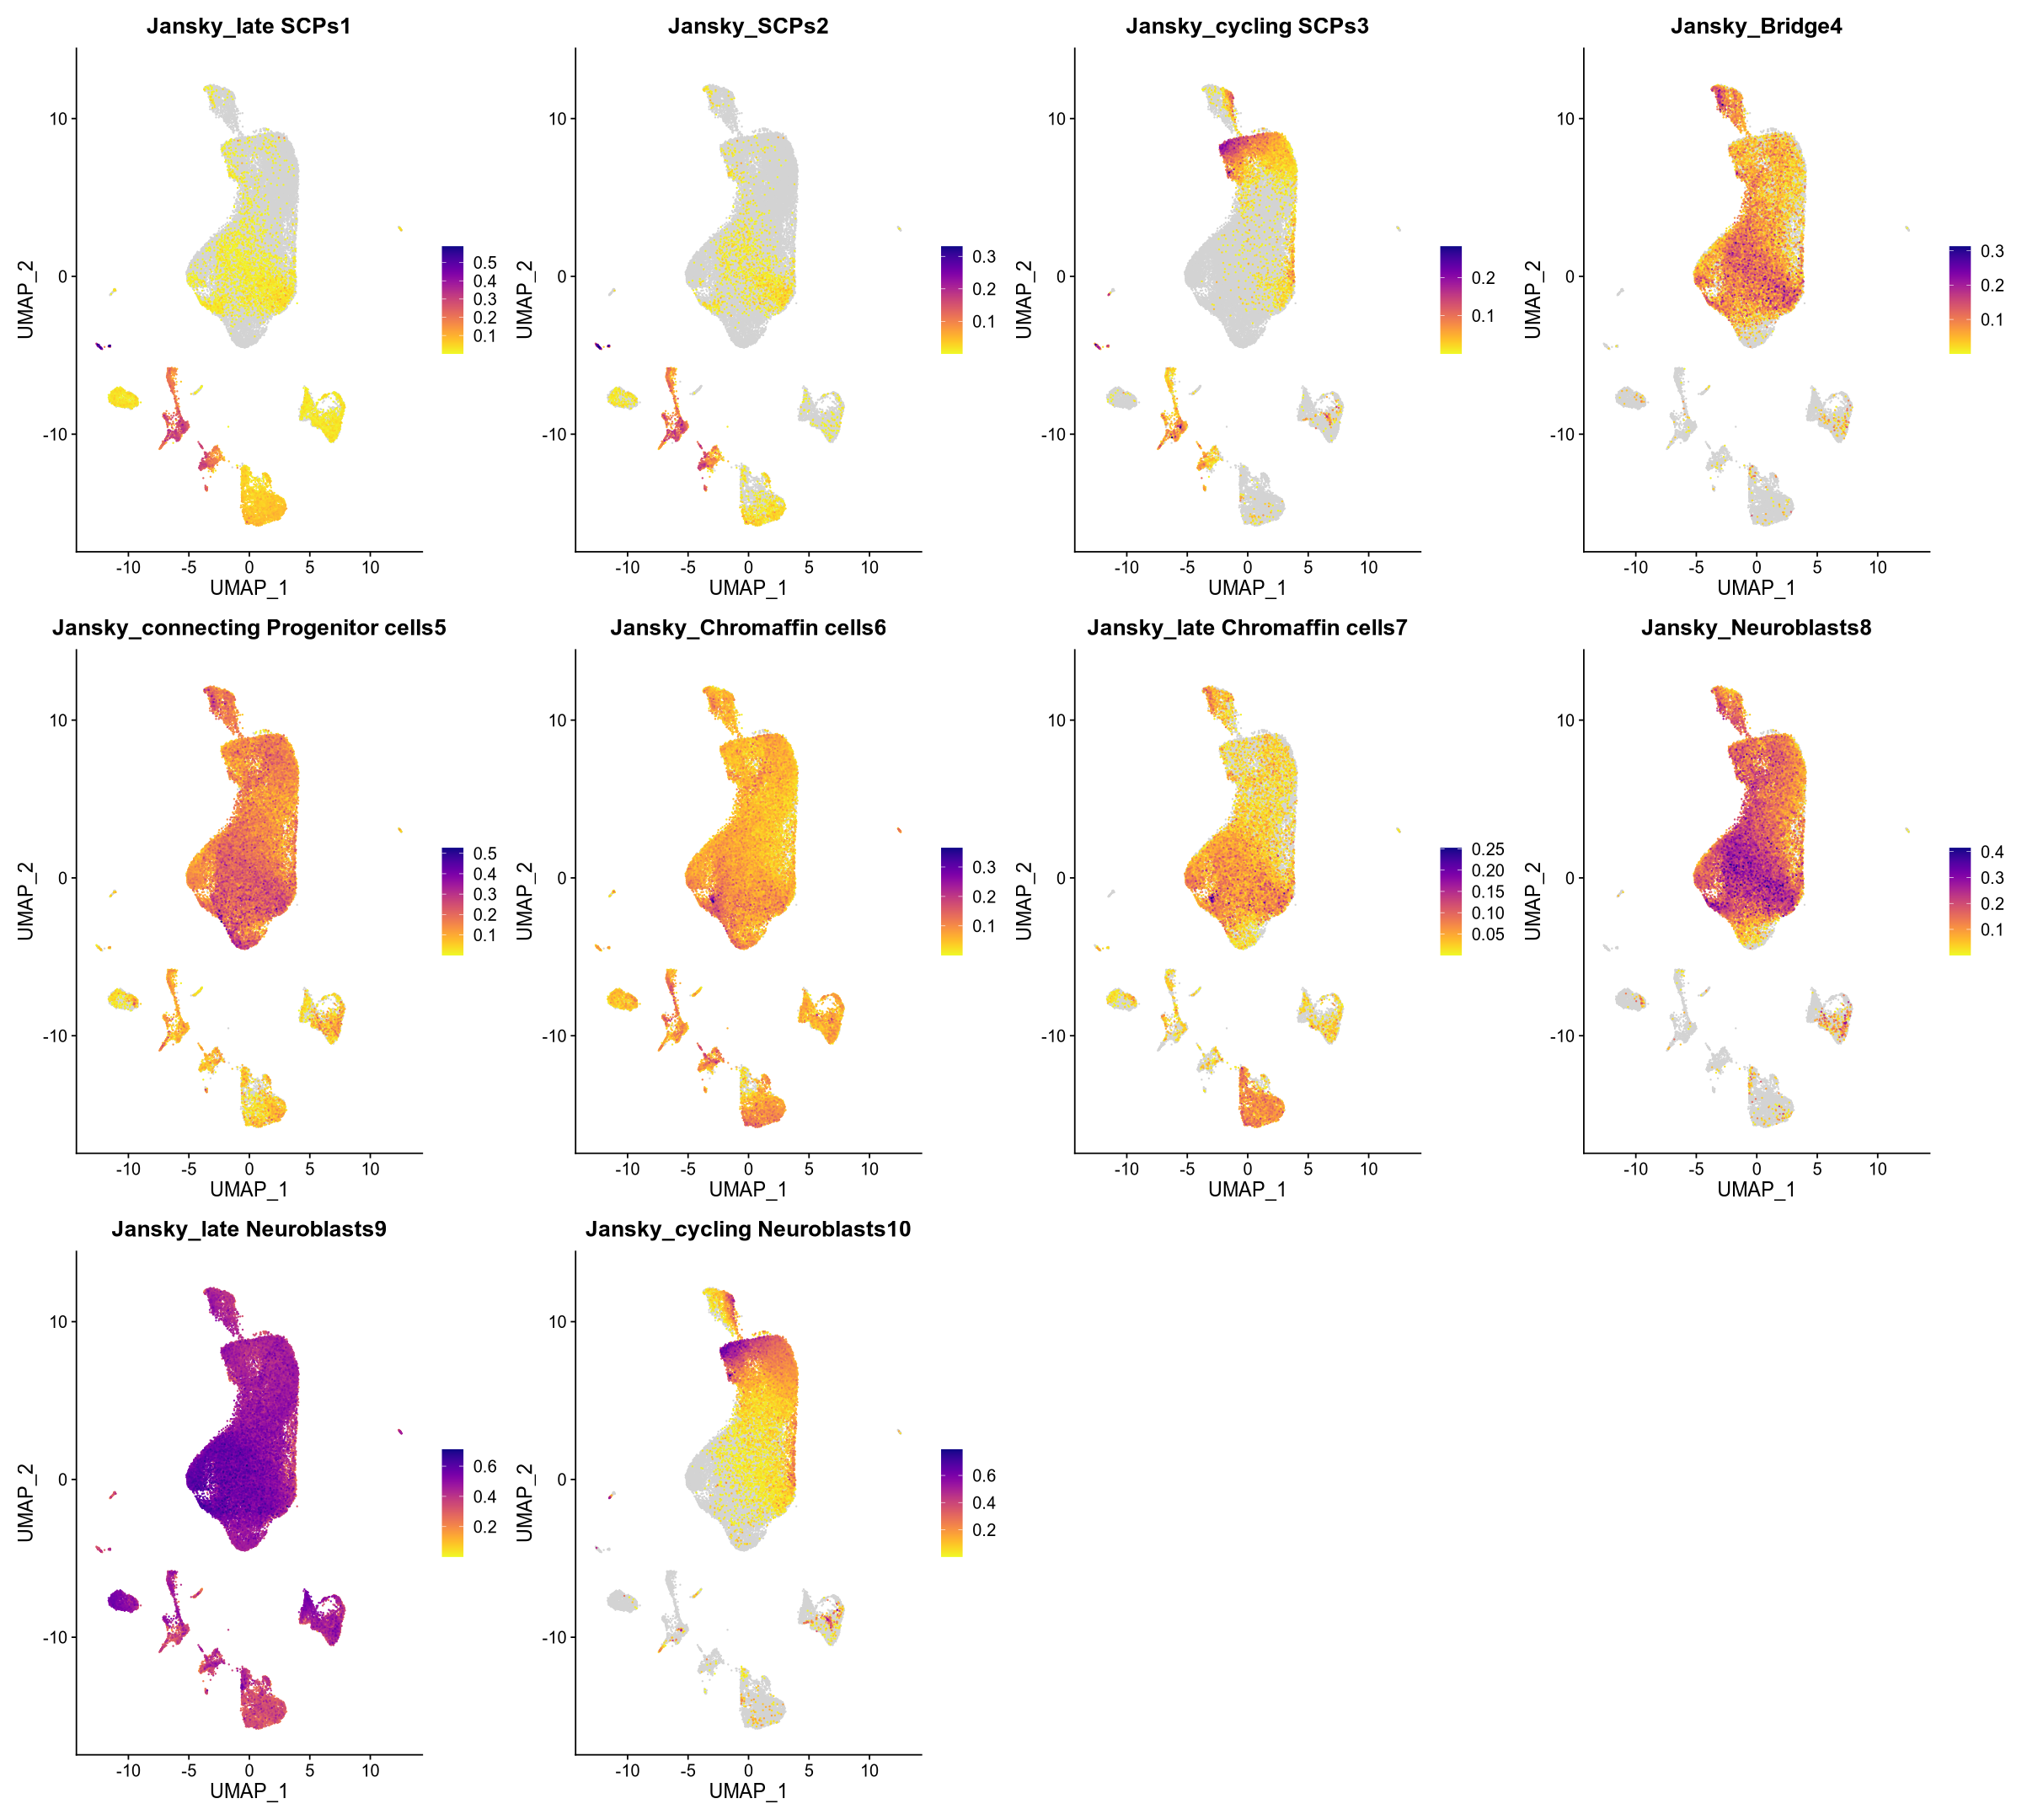

In [403]:
human_feature_plot = FeaturePlot_scCustom(
    seurat_obj_scores, 
    reduction = "umap", 
    features = signature_columns)
human_feature_plot

In [414]:

ggsave(
     glue::glue('/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/',
    'results/figures/2024/Figure_2/20240814_Figure2A_Human_Jansky.png'),
    plot =human_feature_plot, 
    height = 18,
    width = 20,
    create.dir=TRUE
      )


In [398]:
jensky_signature$mouse_genes = str_to_title(jensky_signature$gene)

In [399]:
gene_sets = split(jensky_signature$mouse_genes, jensky_signature$cluster)

In [400]:
homo_copy_score = AddModuleScore(
        object = homo_copy,
        features = gene_sets[jensky_signature$cluster %>% unique],
    name = paste0('Jansky_',jensky_signature$cluster %>% unique)
    )

Warning message:
“The following features are not present in the object: Abca8, Rp11-308n19.1, Rp11-242p2.1, Nr2f2-As1, Gpr126, Qki, Aqp4-As1, Rp11-776h12.1, Kiaa1217, Linc00478, C10orf11, Ppap2a, Ctd-3088g3.8, Rp11-436k8.1, Znf536, Wbscr17, Cyp27c1, Nlgn4x, Rp11-141m1.3, Znf804b, Casc15, Fam134b, Rp11-366l20.2, C4orf19, Garem, Rp11-307p5.1, Hes4, Gpr98, Mir181a1hg, Leprel1, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: Rp11-152k4.2, Qki, Gpr126, Casc15, Nr2f2-As1, Rp11-436k8.1, Rp11-366l20.2, Rp11-776h12.1, Vcan-As1, Kiaa1755, Rp11-413b19.2, Ac090673.2, Sgk223, Abca8, Rp11-366l20.3, Cyp27c1, Garem, Mir181a1hg, Gng12-As1, Znf536, Ppap2a, Kiaa1217, C4orf19, Linc00478, Rp11-945c19.4, C3orf70, Aqp4-As1, Ac008937.2, Znf521, Fbn3, Ctd-3088g3.8, Rp11-649g15.2, Rp11-696n14.1, Rp11-444d3.1, Ctd-2647l4.1, Arhgef35, Erbb2ip, Mir181a2hg, Rp11-37b2.1, Lphn2, Linc01057, C10orf11, Kiaa0922, Mef2c-As1, Rp11-242p2.1, Rp11-141m1.3, Rp11-123o10

Warning message:
“Some of the plotted features are from meta.data slot.
• Please check that `na_cutoff` param is being set appropriately for those features.”


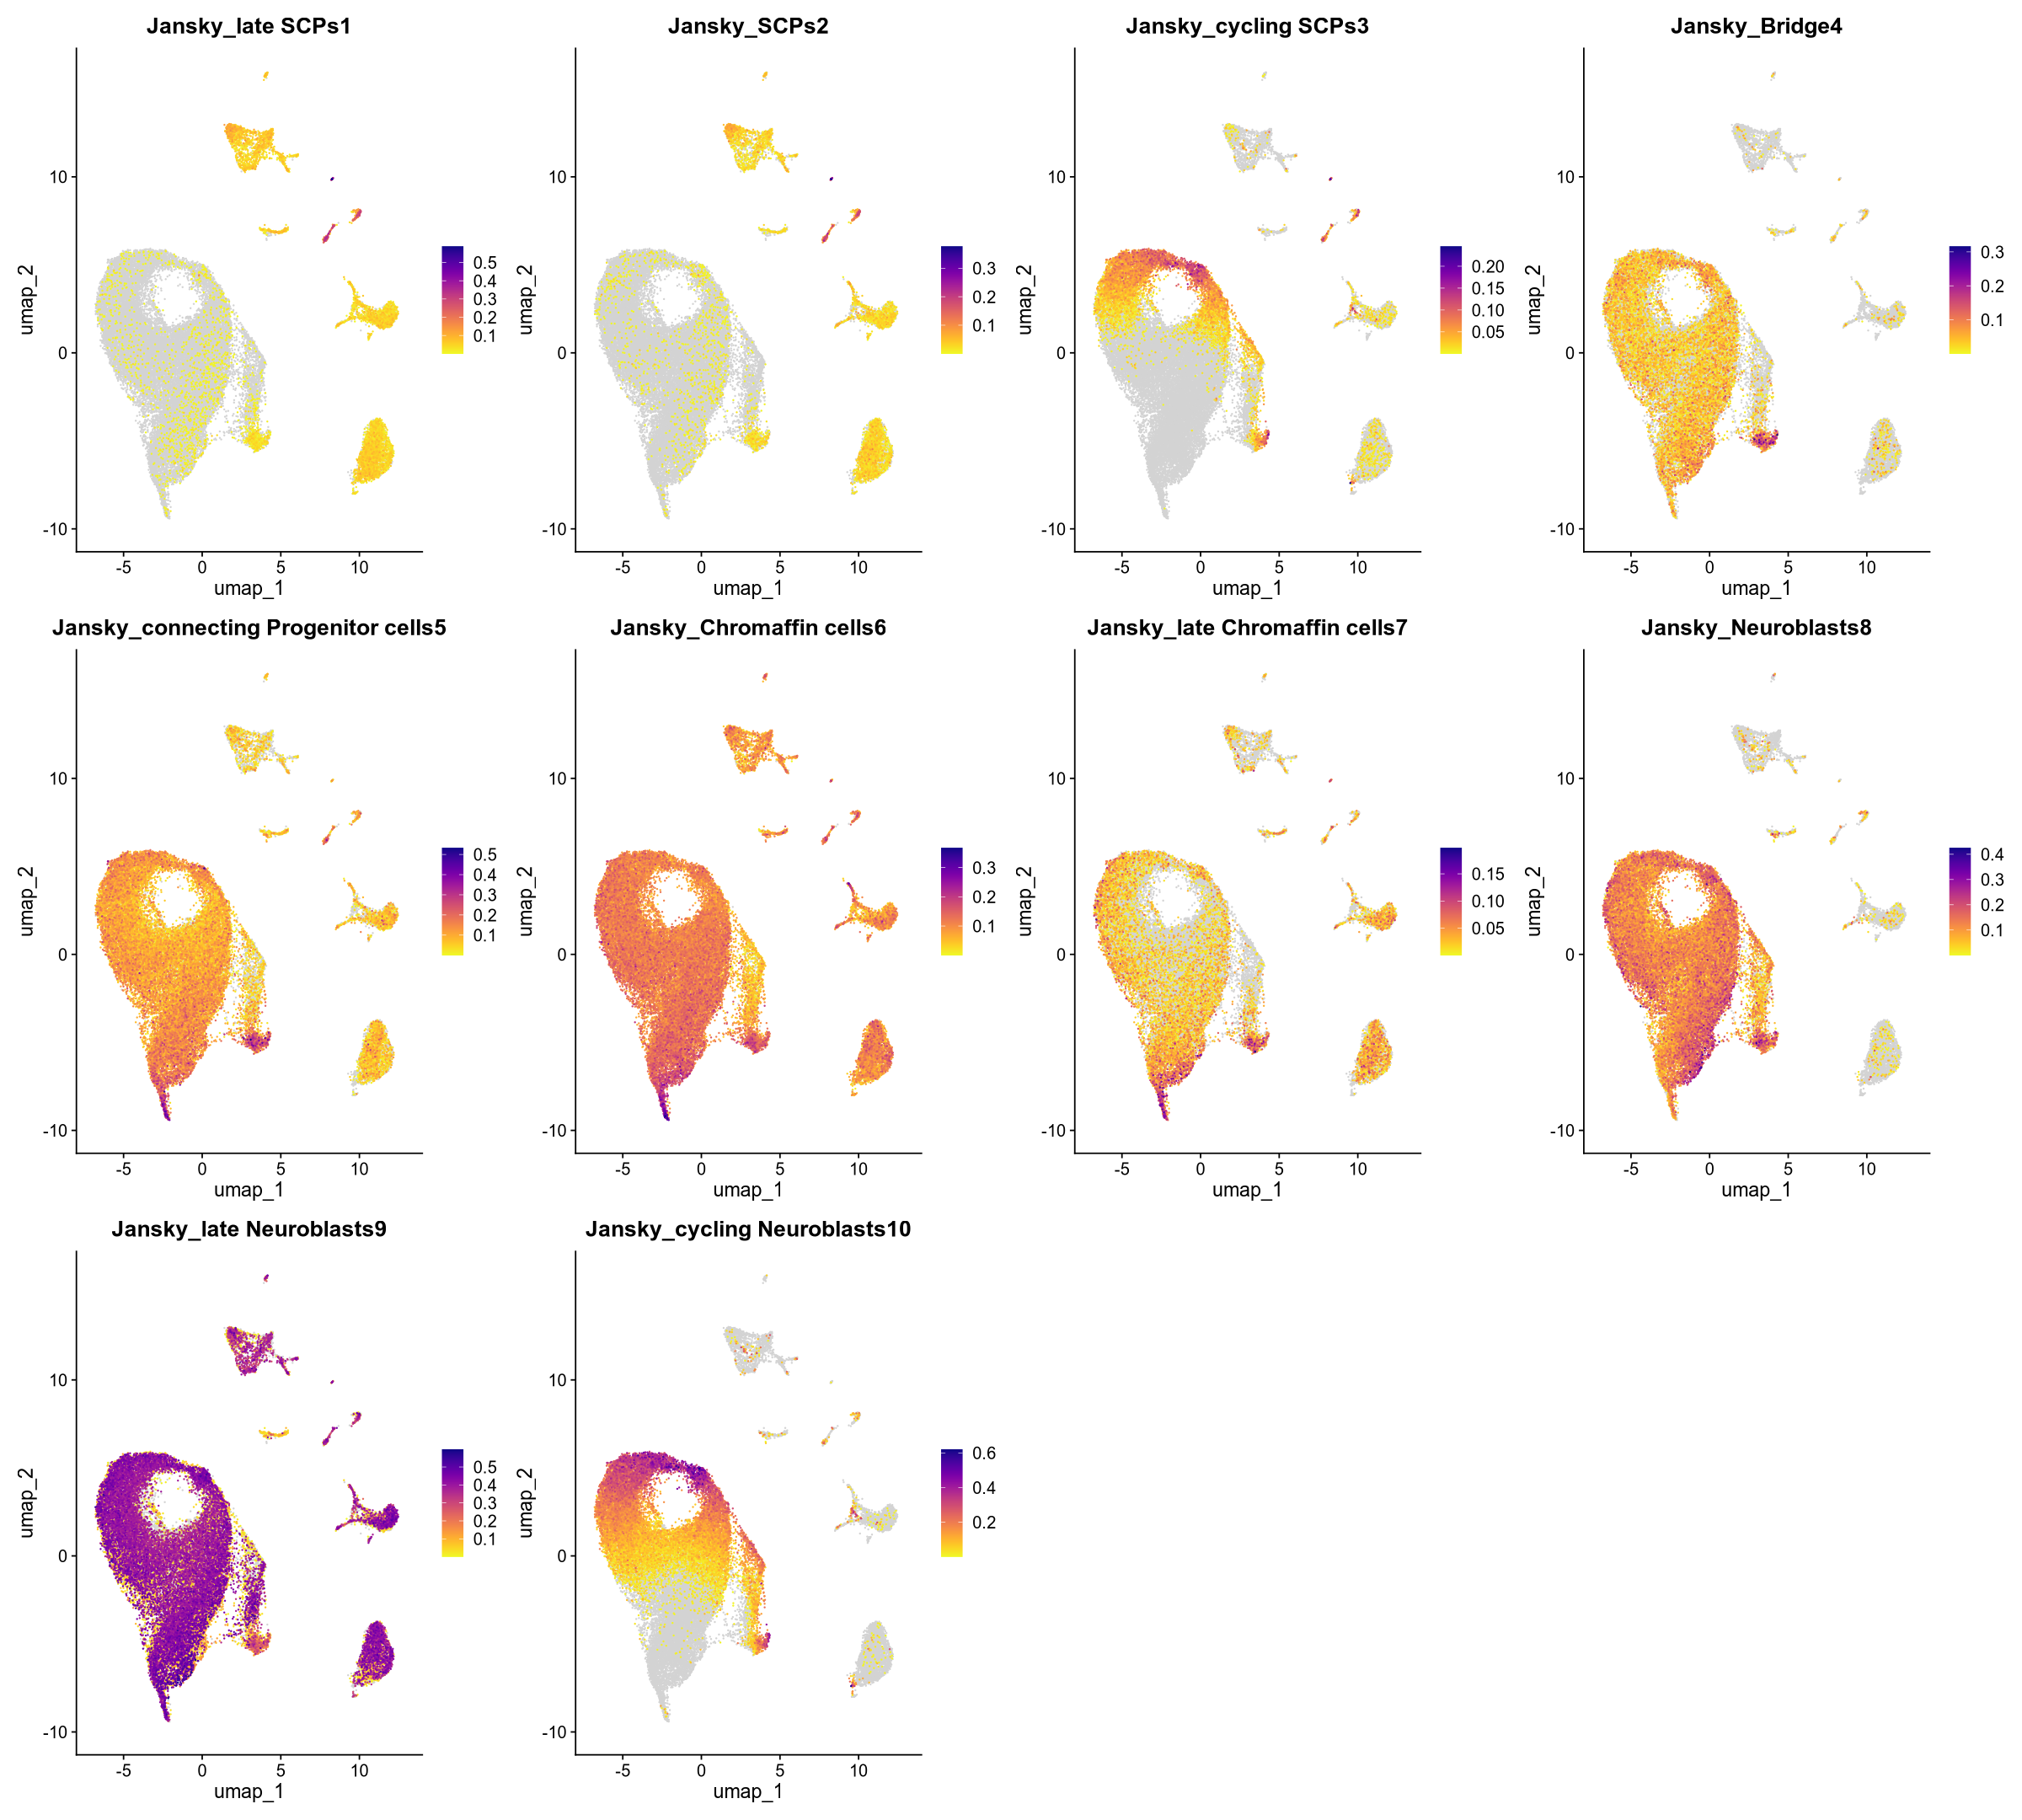

In [405]:
homo_feature_plot = FeaturePlot_scCustom(
    homo_copy_score, 
    reduction = "umap", 
    features = signature_columns)
homo_feature_plot

In [413]:
ggsave(
     glue::glue('/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/',
    'results/figures/2024/Figure_2/20240814_Figure2A_Homo_Jansky.png'),
    plot =homo_feature_plot, 
    height = 18,
    width = 20,
    create.dir=TRUE
      )

In [407]:
hemi_copy_score = AddModuleScore(
        object = hemi_copy,
        features = gene_sets[jensky_signature$cluster %>% unique],
    name = paste0('Jansky_',jensky_signature$cluster %>% unique)
    )

Warning message:
“The following features are not present in the object: Abca8, Rp11-308n19.1, Rp11-242p2.1, Nr2f2-As1, Gpr126, Qki, Aqp4-As1, Rp11-776h12.1, Kiaa1217, Linc00478, C10orf11, Ppap2a, Ctd-3088g3.8, Rp11-436k8.1, Znf536, Wbscr17, Cyp27c1, Nlgn4x, Rp11-141m1.3, Znf804b, Casc15, Fam134b, Rp11-366l20.2, C4orf19, Garem, Rp11-307p5.1, Hes4, Gpr98, Mir181a1hg, Leprel1, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: Rp11-152k4.2, Qki, Gpr126, Casc15, Nr2f2-As1, Rp11-436k8.1, Rp11-366l20.2, Rp11-776h12.1, Vcan-As1, Kiaa1755, Rp11-413b19.2, Ac090673.2, Sgk223, Abca8, Rp11-366l20.3, Cyp27c1, Garem, Mir181a1hg, Gng12-As1, Znf536, Ppap2a, Kiaa1217, C4orf19, Linc00478, Rp11-945c19.4, C3orf70, Aqp4-As1, Ac008937.2, Znf521, Fbn3, Ctd-3088g3.8, Rp11-649g15.2, Rp11-696n14.1, Rp11-444d3.1, Ctd-2647l4.1, Arhgef35, Erbb2ip, Mir181a2hg, Rp11-37b2.1, Lphn2, Linc01057, C10orf11, Kiaa0922, Mef2c-As1, Rp11-242p2.1, Rp11-141m1.3, Rp11-123o10

Warning message:
“Some of the plotted features are from meta.data slot.
• Please check that `na_cutoff` param is being set appropriately for those features.”


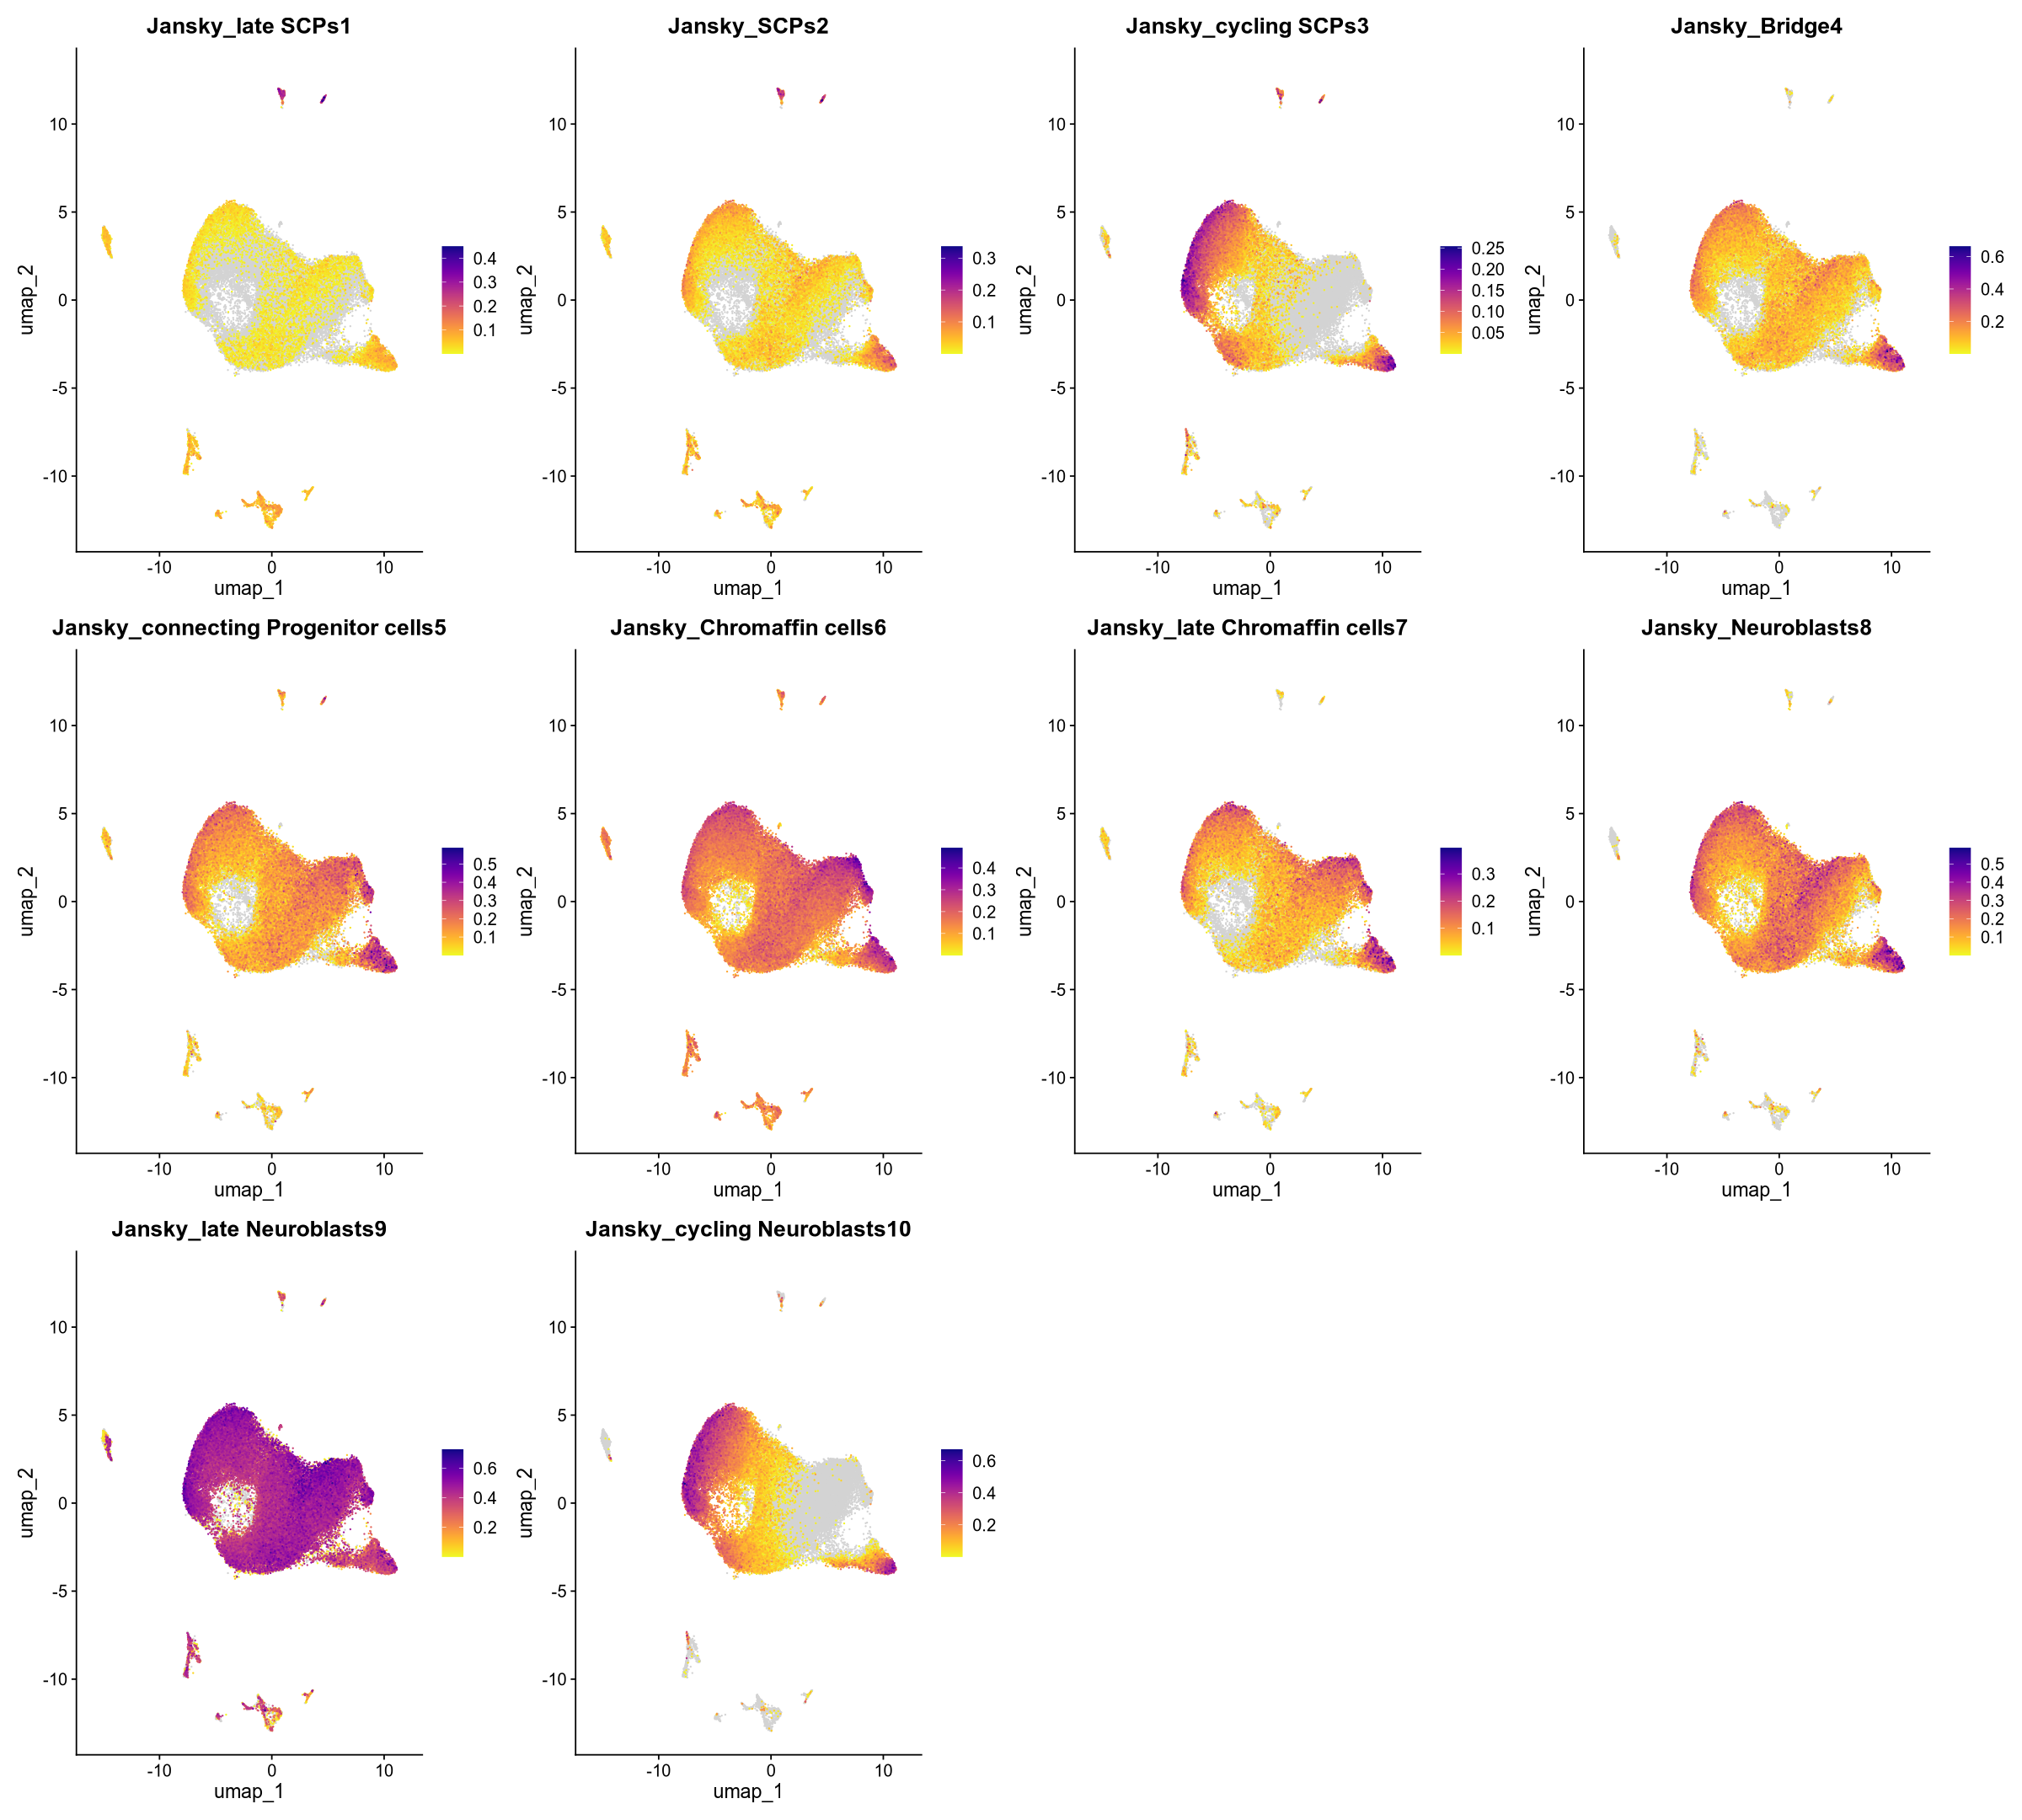

In [410]:
hemi_feature_plot = FeaturePlot_scCustom(
    hemi_copy_score, 
    reduction = "umap", 
    features = signature_columns)
hemi_feature_plot

In [412]:
ggsave(
     glue::glue('/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/',
    'results/figures/2024/Figure_2/20240814_Figure2A_Hemi_Jansky.png'),
    plot =hemi_feature_plot, 
    height = 18,
    width = 20,
    create.dir=TRUE
      )

In [416]:
homo_copy_score

An object of class Seurat 
33411 features across 41430 samples within 2 assays 
Active assay: RNA (31411 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: integrated
 2 dimensional reductions calculated: pca, umap

In [418]:
rownames(homo_copy_score)[grepl('^Cd24', rownames(homo_copy_score))]

[1] "Cd247" "Cd244" "Cd24a" "Cd248"

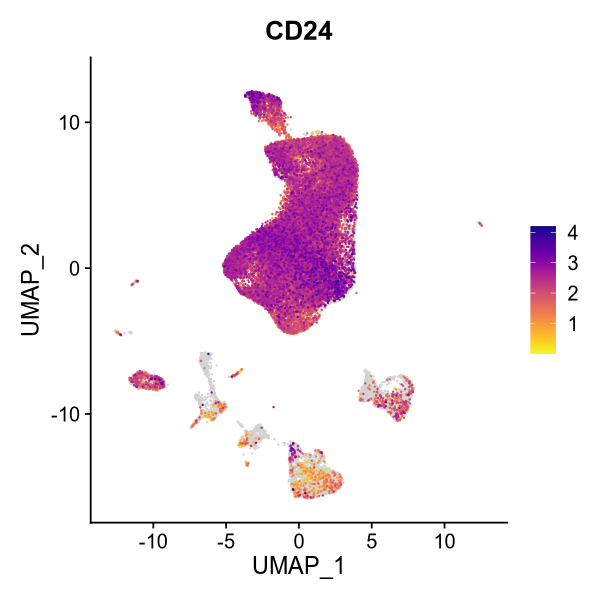

In [427]:
fig.size(5,5)
cd_human= FeaturePlot_scCustom(
    seurat_obj_scores, 
    reduction = "umap", 
    features = c('CD24'))
cd_human

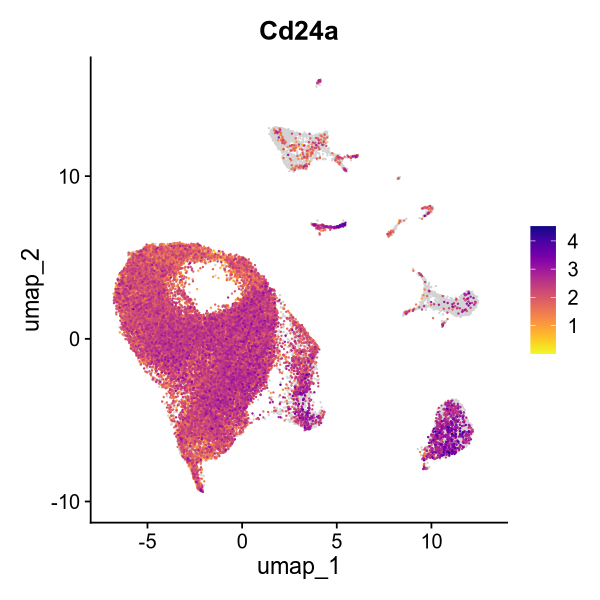

In [420]:
fig.size(5,5)
cd_homo= FeaturePlot_scCustom(
    homo_copy_score, 
    reduction = "umap", 
    features = c('Cd24a'))
cd_homo

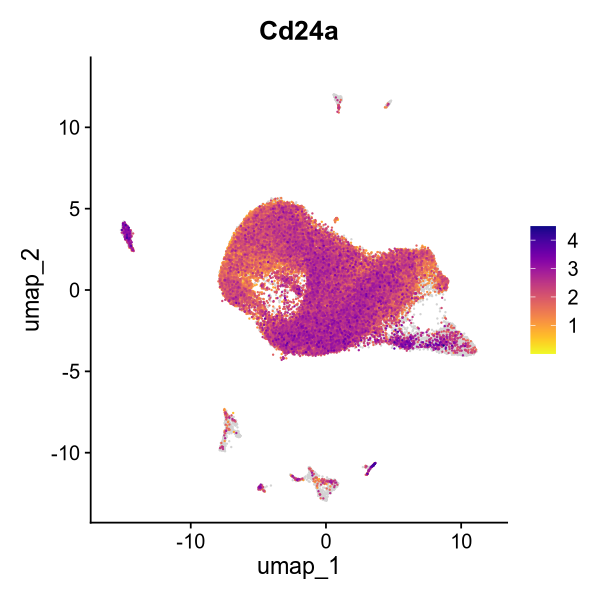

In [421]:
fig.size(5,5)
cd_hemi= FeaturePlot_scCustom(
    hemi_copy_score, 
    reduction = "umap", 
    features = c('Cd24a'))
cd_hemi

In [422]:
ggsave(
     glue::glue('/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/',
    'results/figures/2024/Figure_3/Figure3_homo_Cd24.pdf'),
    plot = cd_homo, 
    height = 5,
    width = 5,
    create.dir=TRUE
      )

In [423]:
ggsave(
     glue::glue('/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/',
    'results/figures/2024/Figure_3/Figure3_hemi_Cd24.pdf'),
    plot = cd_hemi, 
    height = 5,
    width = 5,
    create.dir=TRUE
      )

In [428]:
ggsave(
     glue::glue('/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/',
    'results/figures/2024/Figure_3/Figure3_human_Cd24.pdf'),
    plot = cd_human, 
    height = 5,
    width = 5,
    create.dir=TRUE
      )